In [ ]:
from google.colab import files
import os, io, time

os.chdir('/content/')
try:
  os.mkdir('Imagens', )
except:
  print('A pasta já existe.')
os.chdir('./Imagens')
os.listdir()
uploaded_images = files.upload()

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog

hog_features_256_20 = []
hog_features_256_16 = []
hog_features_128_20 = []
hog_features_128_16 = []

for filename in uploaded_images.keys():
    image = imread(filename)
    image_resized = resize(image, (128, 128))
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(20, 20),
                        cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    hog_features_128_20.append(fd)

for filename in uploaded_images.keys():
    image = imread(filename)
    image_resized = resize(image, (128, 128))
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(16, 16),
                        cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    hog_features_128_16.append(fd)

In [ ]:
for filename in uploaded_images.keys():
    image = imread(filename)
    image_resized = resize(image, (256, 256))
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(20, 20),
                        cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    hog_features_256_20.append(fd)

for filename in uploaded_images.keys():
    image = imread(filename)
    image_resized = resize(image, (256, 256))
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(16, 16),
                        cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    hog_features_256_16.append(fd)

In [ ]:
import pandas as pd
import numpy as np

labels = []
filenames = list(uploaded_images.keys())

for filename in filenames:
    filename_lower = filename.lower()
    if 'american_bulldog' in filename_lower or 'american bulldog' in filename_lower:
        labels.append('American_Bulldog')
    elif 'bengal' in filename_lower:
        labels.append('Bengal')
    elif 'pug' in filename_lower:
        labels.append('Pug')
    elif 'ragdoll' in filename_lower:
        labels.append('Ragdoll')
    else:
        labels.append('unknown')
        print(f"Arquivo não identificado: {filename}")

print(f"Total de imagens: {len(filenames)}")
print(f"Labels criados: {len(labels)}")

df_128_20 = pd.DataFrame(hog_features_128_20)
df_128_20['label'] = labels
df_128_20['filename'] = filenames

df_128_16 = pd.DataFrame(hog_features_128_16)
df_128_16['label'] = labels
df_128_16['filename'] = filenames

df_256_20 = pd.DataFrame(hog_features_256_20)
df_256_20['label'] = labels
df_256_20['filename'] = filenames

df_256_16 = pd.DataFrame(hog_features_256_16)
df_256_16['label'] = labels
df_256_16['filename'] = filenames

df_128_20.to_csv('dataset_128x128_cells_20x20.csv', index=False)
df_128_16.to_csv('dataset_128x128_cells_16x16.csv', index=False)
df_256_20.to_csv('dataset_256x256_cells_20x20.csv', index=False)
df_256_16.to_csv('dataset_256x256_cells_16x16.csv', index=False)

print("Datasets salvos em CSV:")
print("- dataset_128x128_cells_20x20.csv")
print("- dataset_128x128_cells_16x16.csv")
print("- dataset_256x256_cells_20x20.csv")
print("- dataset_256x256_cells_16x16.csv")

print(f"\nDistribuição das raças:")
print(f"American Bulldog: {labels.count('American_Bulldog')}")
print(f"Bengal: {labels.count('Bengal')}")
print(f"Pug: {labels.count('Pug')}")
print(f"Ragdoll: {labels.count('Ragdoll')}")
print(f"Não identificados: {labels.count('unknown')}")

print(f"\nInformações dos datasets:")
print(f"Dataset 128x128 (20x20): {df_128_20.shape}")
print(f"Dataset 128x128 (16x16): {df_128_16.shape}")
print(f"Dataset 256x256 (20x20): {df_256_20.shape}")
print(f"Dataset 256x256 (16x16): {df_256_16.shape}")

# Download dos arquivos CSV (no Google Colab)
#from google.colab import files
#files.download('dataset_128x128_cells_20x20.csv')
#files.download('dataset_128x128_cells_16x16.csv')
#files.download('dataset_256x256_cells_20x20.csv')
#files.download('dataset_256x256_cells_16x16.csv')

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_vgg19
from tensorflow.keras.utils import img_to_array
import time
import os

# Gerar rótulos e nomes de arquivos uma única vez
print("1. Criando rótulos a partir dos nomes dos arquivos...")
filenames = list(uploaded_images.keys())
labels = []

for filename in filenames:
    filename_lower = filename.lower()
    if 'american_bulldog' in filename_lower or 'american bulldog' in filename_lower:
        labels.append('American_Bulldog')
    elif 'bengal' in filename_lower:
        labels.append('Bengal')
    elif 'pug' in filename_lower:
        labels.append('Pug')
    elif 'ragdoll' in filename_lower:
        labels.append('Ragdoll')
    else:
        labels.append('unknown')

print(f"Total de {len(filenames)} imagens e {len(labels)} rótulos gerados.")
print("-" * 30)


# Definir as configurações para a extração
configurations = [
    {'model_name': 'VGG16', 'model_func': VGG16, 'preprocess': preprocess_vgg16, 'pooling': 'avg'},
    {'model_name': 'VGG16', 'model_func': VGG16, 'preprocess': preprocess_vgg16, 'pooling': 'max'},
    {'model_name': 'VGG19', 'model_func': VGG19, 'preprocess': preprocess_vgg19, 'pooling': 'avg'},
    {'model_name': 'VGG19', 'model_func': VGG19, 'preprocess': preprocess_vgg19, 'pooling': 'max'},
]

image_sizes = [(128, 128), (256, 256)]
all_datasets_info = {}

# Loop principal para extração de características
for config in configurations:
    print(f"Processando com: Modelo={config['model_name']}, Pooling={config['pooling']}")

    # Carregar o modelo base
    model = config['model_func'](weights='imagenet', include_top=False, pooling=config['pooling'])

    for size in image_sizes:
        start_time = time.time()
        cnn_features = []
        image_height, image_width = size

        print(f"  > Redimensionando para {image_height}x{image_width} pixels...")

        for filename in filenames:
            # Carregar e pré-processar a imagem
            image = imread(filename)

            image_resized = resize(image, (image_height, image_width))
            x = img_to_array(image_resized) * 255.0
            x = np.expand_dims(x, axis=0)
            x = config['preprocess'](x)

            # Extrair, achatar e adicionar características
            features = model.predict(x, verbose=0)
            cnn_features.append(features.flatten())

        # Criar DataFrame e salvar em CSV
        df = pd.DataFrame(cnn_features)
        df['label'] = labels
        df['filename'] = filenames

        csv_filename = f"dataset_{config['model_name'].lower()}_{config['pooling']}_{image_height}x{image_width}.csv"
        df.to_csv(csv_filename, index=False)

        all_datasets_info[csv_filename] = df.shape
        end_time = time.time()

        print(f"    - Concluído em {end_time - start_time:.2f} segundos. Dataset salvo como '{csv_filename}'")

print("\n" + "="*50)
print("RELATÓRIO FINAL DA EXTRAÇÃO")
print("="*50)
print("Todos os 8 datasets foram gerados com sucesso:\n")

for name, shape in all_datasets_info.items():
    print(f"- Arquivo: {name}, Dimensões: {shape[0]} amostras, {shape[1]} colunas (features + label + filename)")

from google.colab import files

print("\nIniciando o download dos arquivos CSV...")
for filename in all_datasets_info.keys():
  files.download(filename)
print("Download concluído.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

print("Carregando os 12 datasets...")

# --- Datasets HOG (4 bases) ---
df_hog_128_16 = pd.read_csv('dataset_128x128_cells_16x16.csv')
df_hog_128_20 = pd.read_csv('dataset_128x128_cells_20x20.csv')
df_hog_256_16 = pd.read_csv('dataset_256x256_cells_16x16.csv')
df_hog_256_20 = pd.read_csv('dataset_256x256_cells_20x20.csv')

# --- Datasets CNN VGG16 (4 bases) ---
df_vgg16_128_avg = pd.read_csv('dataset_vgg16_avg_128x128.csv')
df_vgg16_128_max = pd.read_csv('dataset_vgg16_max_128x128.csv')
df_vgg16_256_avg = pd.read_csv('dataset_vgg16_avg_256x256.csv')
df_vgg16_256_max = pd.read_csv('dataset_vgg16_max_256x256.csv')

# --- Datasets CNN VGG19 (4 bases) ---
df_vgg19_128_avg = pd.read_csv('dataset_vgg19_avg_128x128.csv')
df_vgg19_128_max = pd.read_csv('dataset_vgg19_max_128x128.csv')
df_vgg19_256_avg = pd.read_csv('dataset_vgg19_avg_256x256.csv')
df_vgg19_256_max = pd.read_csv('dataset_vgg19_max_256x256.csv')

datasets = {
    'HOG_128_16x16': df_hog_128_16,
    'HOG_128_20x20': df_hog_128_20,
    'HOG_256_16x16': df_hog_256_16,
    'HOG_256_20x20': df_hog_256_20,
    'CNN_VGG16_128_avg': df_vgg16_128_avg,
    'CNN_VGG16_128_max': df_vgg16_128_max,
    'CNN_VGG16_256_avg': df_vgg16_256_avg,
    'CNN_VGG16_256_max': df_vgg16_256_max,
    'CNN_VGG19_128_avg': df_vgg19_128_avg,
    'CNN_VGG19_128_max': df_vgg19_128_max,
    'CNN_VGG19_256_avg': df_vgg19_256_avg,
    'CNN_VGG19_256_max': df_vgg19_256_max
}

print(f"Total de datasets carregados e prontos para o experimento: {len(datasets)}")

# FUNÇÃO PARA PREPARAR OS DADOS
def prepare_data(df):
    """Prepara os dados separando features e labels"""
    X = df.drop(['label', 'filename'], axis=1)
    y = df['label']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# EXECUTAR EXPERIMENTOS k-NN
k_values = list(range(1, 11))  # k = 1 a 10
results_table = []

print("\nIniciando experimentos k-NN...")
print("="*80)

for dataset_name, df in datasets.items():
    print(f"\nProcessando: {dataset_name}")
    print(f"Shape: {df.shape}")

    X, y = prepare_data(df)
    n_features = X.shape[1]

    row_70_30 = {'Base': f"{dataset_name} ({n_features})", 'Treino/Test': '70/30'}
    row_10_fold = {'Base': '', 'Treino/Test': '10-fold CV'}

    for k in k_values:
        print(f"  k={k}...", end=" ")
        knn = KNeighborsClassifier(n_neighbors=k)

        # 70/30 Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy_70_30 = accuracy_score(y_test, y_pred)

        # 10-fold Cross Validation
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        cv_scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
        accuracy_10_fold = cv_scores.mean()

        row_70_30[f'k={k}'] = round(accuracy_70_30, 4)
        row_10_fold[f'k={k}'] = round(accuracy_10_fold, 4)
        print(f"70/30: {accuracy_70_30:.4f}, 10-fold: {accuracy_10_fold:.4f}")

    results_table.append(row_70_30)
    results_table.append(row_10_fold)

# CRIAR DATAFRAME DOS RESULTADOS
df_results = pd.DataFrame(results_table)
columns_order = ['Base', 'Treino/Test'] + [f'k={k}' for k in k_values]
df_results = df_results[columns_order]

# CALCULAR MÉDIA E DESVIO PADRÃO
print("\nCalculando média e desvio padrão para cada coluna k...")
results_70_30 = df_results[df_results['Treino/Test'] == '70/30'].copy()
results_10_fold = df_results[df_results['Treino/Test'] == '10-fold CV'].copy()

# Preparando as linhas de estatísticas
stats_rows = []
k_cols = [f'k={k}' for k in k_values]

# Processa estatísticas para 70/30
mean_70_30 = results_70_30[k_cols].mean()
std_70_30 = results_70_30[k_cols].std()
stats_rows.append({col: '' for col in columns_order}) # Linha em branco
stats_rows.append({'Base': 'Média (70/30)', 'Treino/Test': '=>', **mean_70_30.round(4)})
stats_rows.append({'Base': 'Desv. Pad. (70/30)', 'Treino/Test': '=>', **std_70_30.round(4)})

# Processa estatísticas para 10-fold
mean_10_fold = results_10_fold[k_cols].mean()
std_10_fold = results_10_fold[k_cols].std()
stats_rows.append({col: '' for col in columns_order}) # Linha em branco
stats_rows.append({'Base': 'Média (10-fold CV)', 'Treino/Test': '=>', **mean_10_fold.round(4)})
stats_rows.append({'Base': 'Desv. Pad. (10-fold CV)', 'Treino/Test': '=>', **std_10_fold.round(4)})

# Concatenar resultados originais com as estatísticas
df_final = pd.concat([df_results, pd.DataFrame(stats_rows)], ignore_index=True)

# EXIBIR E SALVAR RESULTADOS
print("\n" + "="*120)
print("TABELA DE RESULTADOS k-NN (Acurácia)")
print("="*120)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df_final.to_string(index=False))

df_final.to_csv('resultados_knn_experimentos_12_bases.csv', index=False)
print(f"\nResultados salvos em: resultados_knn_experimentos_12_bases.csv")


# ANÁLISE DOS MELHORES RESULTADOS
print("\n" + "="*60)
print("\nANÁLISE DOS MELHORES RESULTADOS")
print("="*60)
print("\nMelhores k por base e método:")

# Método 70/30
print("\nMétodo 70/30:")
for _, row in results_70_30.iterrows():
    base_name = row['Base']
    best_k_row = row[k_cols].astype(float).idxmax()
    best_acc = row[best_k_row]
    print(f"{base_name}: Melhor {best_k_row} (Acurácia: {best_acc:.4f})")

# Método 10-fold
print("\nMétodo 10-fold:")
for _, row in results_10_fold.iterrows():
    base_name = df_results.loc[row.name - 1, 'Base'] # Pega o nome da base da linha acima
    best_k_row = row[k_cols].astype(float).idxmax()
    best_acc = row[best_k_row]
    print(f"{base_name}: Melhor {best_k_row} (Acurácia: {best_acc:.4f})")

print("\n" + "="*80)
print("TOP 6 MELHORES RESULTADOS GLOBAIS (Base, k, Validação)")
print("="*80)

# Preparar dados para encontrar o top 6
df_analysis = df_results.copy()
df_analysis['Base'] = df_analysis['Base'].replace('', np.nan).ffill()
df_analysis['Base'] = df_analysis['Base'].str.replace(r'\s*\(\d+\)', '', regex=True)
df_analysis = df_analysis[~df_analysis['Base'].str.contains('=>', na=False)]

melted_df = df_analysis.melt(
    id_vars=['Base', 'Treino/Test'],
    var_name='k',
    value_name='Acurácia'
)

melted_df['Acurácia'] = pd.to_numeric(melted_df['Acurácia'], errors='coerce')
melted_df.dropna(subset=['Acurácia'], inplace=True)
melted_df['k'] = melted_df['k'].str.replace('k=', '').astype(int)

top_6_results = melted_df.sort_values(by='Acurácia', ascending=False).head(6)

print("As 6 melhores combinações de (Base de Dados, k, Validação) foram:\n")
top_6_results.index = np.arange(1, len(top_6_results) + 1)
print(top_6_results.to_string())


Carregando os 12 datasets...
Total de datasets carregados e prontos para o experimento: 12

Iniciando experimentos k-NN...

Processando: HOG_128_16x16
Shape: (800, 1766)
  k=1... 70/30: 0.4333, 10-fold: 0.4012
  k=2... 70/30: 0.4167, 10-fold: 0.3762
  k=3... 70/30: 0.4375, 10-fold: 0.4075
  k=4... 70/30: 0.4042, 10-fold: 0.3950
  k=5... 70/30: 0.4000, 10-fold: 0.3963
  k=6... 70/30: 0.4125, 10-fold: 0.4188
  k=7... 70/30: 0.4167, 10-fold: 0.4100
  k=8... 70/30: 0.3917, 10-fold: 0.3950
  k=9... 70/30: 0.3875, 10-fold: 0.4050
  k=10... 70/30: 0.3875, 10-fold: 0.3937

Processando: HOG_128_20x20
Shape: (800, 902)
  k=1... 70/30: 0.4333, 10-fold: 0.4263
  k=2... 70/30: 0.4125, 10-fold: 0.3962
  k=3... 70/30: 0.4500, 10-fold: 0.4300
  k=4... 70/30: 0.4583, 10-fold: 0.4338
  k=5... 70/30: 0.4583, 10-fold: 0.4300
  k=6... 70/30: 0.4500, 10-fold: 0.4475
  k=7... 70/30: 0.4625, 10-fold: 0.4562
  k=8... 70/30: 0.4625, 10-fold: 0.4562
  k=9... 70/30: 0.4625, 10-fold: 0.4650
  k=10... 70/30: 0.4625

In [ ]:
from google.colab import files
files.download('resultados_knn_experimentos_12_bases.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# CARREGAR RESULTADOS ANTERIORES E IDENTIFICAR MELHORES/PIORES
print("Analisando resultados anteriores...")

datasets_original = {
    'HOG_128_16x16': pd.read_csv('dataset_128x128_cells_16x16.csv'),
    'HOG_128_20x20': pd.read_csv('dataset_128x128_cells_20x20.csv'),
    'HOG_256_16x16': pd.read_csv('dataset_256x256_cells_16x16.csv'),
    'HOG_256_20x20': pd.read_csv('dataset_256x256_cells_20x20.csv'),
    'CNN_VGG16_128_avg': pd.read_csv('dataset_vgg16_avg_128x128.csv'),
    'CNN_VGG16_128_max': pd.read_csv('dataset_vgg16_max_128x128.csv'),
    'CNN_VGG16_256_avg': pd.read_csv('dataset_vgg16_avg_256x256.csv'),
    'CNN_VGG16_256_max': pd.read_csv('dataset_vgg16_max_256x256.csv'),
    'CNN_VGG19_128_avg': pd.read_csv('dataset_vgg19_avg_128x128.csv'),
    'CNN_VGG19_126_max': pd.read_csv('dataset_vgg19_max_128x128.csv'),
    'CNN_VGG19_256_avg': pd.read_csv('dataset_vgg19_avg_256x256.csv'),
    'CNN_VGG19_256_max': pd.read_csv('dataset_vgg19_max_256x256.csv')

}

def prepare_data(df):
    X = df.drop(['label', 'filename'], axis=1)
    y = df['label']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# CALCULAR PERFORMANCE MÉDIA DE CADA BASE
print("Calculando performance de cada base...")

base_performances = {}
k_values = list(range(1, 11))

for dataset_name, df in datasets_original.items():
    print(f"Avaliando: {dataset_name}")
    X, y = prepare_data(df)

    total_accuracy = 0
    count = 0

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)

        # 70/30 Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc_70_30 = accuracy_score(y_test, y_pred)

        # 10-fold CV
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        cv_scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
        acc_10_fold = cv_scores.mean()

        # Média das duas validações
        avg_acc = (acc_70_30 + acc_10_fold) / 2
        total_accuracy += avg_acc
        count += 1

    # Performance média da base
    base_performances[dataset_name] = total_accuracy / count

# IDENTIFICAR 6 MELHORES E 6 PIORES
sorted_performances = sorted(base_performances.items(), key=lambda x: x[1], reverse=True)

best_6 = [item[0] for item in sorted_performances[:6]]
worst_6 = [item[0] for item in sorted_performances[-6:]]

print("\n" + "="*60)
print("RANKING DAS BASES")
print("="*60)
for i, (base, performance) in enumerate(sorted_performances, 1):
    status = "MELHOR" if base in best_6 else "PIOR" if base in worst_6 else ""
    print(f"{i:2d}. {base:<25} - {performance:.4f} {status}")

print(f"\n6 MELHORES BASES:")
for base in best_6:
    print(f"  - {base}")

print(f"\n6 PIORES BASES (serão substituídas):")
for base in worst_6:
    print(f"  - {base}")

# APLICAR PCA NAS 6 MELHORES BASES
print("\n" + "="*60)
print("APLICANDO PCA (10 componentes) NAS 6 MELHORES BASES")
print("="*60)

pca_datasets = {}

for base_name in best_6:
    print(f"\nProcessando PCA para: {base_name}")

    df_original = datasets_original[base_name]
    X, y = prepare_data(df_original)

    print(f"  Dimensões originais: {X.shape}")

    # Aplicar PCA com 10 componentes
    pca = PCA(n_components=10, random_state=42)
    X_pca = pca.fit_transform(X)

    print(f"  Dimensões após PCA: {X_pca.shape}")
    print(f"  Variância explicada: {pca.explained_variance_ratio_.sum():.4f}")

    # Criar novo dataset com PCA
    df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
    df_pca['label'] = y.values
    df_pca['filename'] = df_original['filename'].values

    pca_name = f"PCA_{base_name}"
    pca_datasets[pca_name] = df_pca

    filename = f"dataset_{pca_name}.csv"
    df_pca.to_csv(filename, index=False)
    print(f"  Dataset PCA salvo: {filename}")

# CRIAR NOVA CONFIGURAÇÃO DE DATASETS
print("\n" + "="*60)
print("CRIANDO NOVA CONFIGURAÇÃO DE DATASETS")
print("="*60)

new_datasets = {}

# Adicionar 6 melhores originais
for base_name in best_6:
    new_datasets[base_name] = datasets_original[base_name]

for pca_name, pca_df in pca_datasets.items():
    new_datasets[pca_name] = pca_df

print("Nova configuração de datasets:")
for i, dataset_name in enumerate(new_datasets.keys(), 1):
    dataset_type = "ORIGINAL" if not dataset_name.startswith("PCA_") else "PCA"
    print(f"{i:2d}. {dataset_name:<35} - {dataset_type}")

# EXECUTAR NOVOS EXPERIMENTOS k-NN

print("\n" + "="*80)
print("EXECUTANDO NOVOS EXPERIMENTOS k-NN")
print("="*80)

new_results_table = []

for dataset_name, df in new_datasets.items():
    print(f"\nProcessando: {dataset_name}")
    print(f"Shape: {df.shape}")

    X, y = prepare_data(df)

    n_features = X.shape[1]

    row_70_30 = {'Base': f"{dataset_name} ({n_features})", 'Treino/Test': '70/30'}
    row_10_fold = {'Base': '', 'Treino/Test': '10-fold CV'}

    for k in k_values:
        print(f"  k={k}...", end=" ")

        knn = KNeighborsClassifier(n_neighbors=k)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy_70_30 = accuracy_score(y_test, y_pred)

        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        cv_scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
        accuracy_10_fold = cv_scores.mean()

        row_70_30[f'k={k}'] = round(accuracy_70_30, 4)
        row_10_fold[f'k={k}'] = round(accuracy_10_fold, 4)

        print(f"70/30: {accuracy_70_30:.4f}, 10-fold: {accuracy_10_fold:.4f}")

    new_results_table.append(row_70_30)
    new_results_table.append(row_10_fold)

# CRIAR NOVA TABELA DE RESULTADOS
df_new_results = pd.DataFrame(new_results_table)
columns_order = ['Base', 'Treino/Test'] + [f'k={k}' for k in k_values]
df_new_results = df_new_results[columns_order]

# CALCULAR NOVAS ESTATÍSTICAS
print("\nCalculando novas estatísticas...")

new_results_70_30 = df_new_results[df_new_results['Treino/Test'] == '70/30'].copy()
new_results_10_fold = df_new_results[df_new_results['Treino/Test'] == '10-fold CV'].copy()

new_stats_70_30 = {'Base': 'Média =>', 'Treino/Test': ''}
new_stats_std_70_30 = {'Base': 'Desv. Pad. =>', 'Treino/Test': ''}
new_stats_10_fold = {'Base': 'Média =>', 'Treino/Test': ''}
new_stats_std_10_fold = {'Base': 'Desv. Pad. =>', 'Treino/Test': ''}

for k in k_values:
    k_col = f'k={k}'

    # 70/30 stats
    values_70_30 = new_results_70_30[k_col].dropna()
    mean_70_30 = values_70_30.mean()
    std_70_30 = values_70_30.std()

    new_stats_70_30[k_col] = f"{mean_70_30:.4f}"
    new_stats_std_70_30[k_col] = f"{std_70_30:.4f}"

    # 10-fold stats
    values_10_fold = new_results_10_fold[k_col].dropna()
    mean_10_fold = values_10_fold.mean()
    std_10_fold = values_10_fold.std()

    new_stats_10_fold[k_col] = f"{mean_10_fold:.4f}"
    new_stats_std_10_fold[k_col] = f"{std_10_fold:.4f}"

# CRIAR TABELA FINAL COM ESTATÍSTICAS
new_final_results = df_new_results.to_dict('records')

new_final_results.append({col: '' for col in columns_order})

new_final_results.append(new_stats_70_30)
new_final_results.append(new_stats_std_70_30)

new_final_results.append({col: '' for col in columns_order})

new_final_results.append(new_stats_10_fold)
new_final_results.append(new_stats_std_10_fold)

df_new_final = pd.DataFrame(new_final_results)

# EXIBIR E SALVAR NOVOS RESULTADOS
print("\n" + "="*120)
print("NOVA TABELA DE RESULTADOS k-NN (6 MELHORES + 6 PCA)")
print("="*120)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df_new_final.to_string(index=False))

# Salvar resultados
df_new_final.to_csv('resultados_knn_com_pca.csv', index=False)
print(f"\nNovos resultados salvos em: resultados_knn_com_pca.csv")

# COMPARAÇÃO ANTES E DEPOIS
print("\n" + "="*60)
print("COMPARAÇÃO DE PERFORMANCE")
print("="*60)

# Calcular performance média antes e depois
old_mean_70_30 = new_results_70_30[[f'k={k}' for k in k_values[:6]]].mean().mean()  # Primeiros 6 (originais)
old_mean_10_fold = new_results_10_fold[[f'k={k}' for k in k_values[:6]]].mean().mean()

new_mean_70_30 = new_results_70_30[[f'k={k}' for k in k_values[6:]]].mean().mean()  # Últimos 6 (PCA)
new_mean_10_fold = new_results_10_fold[[f'k={k}' for k in k_values[6:]]].mean().mean()

print(f"Performance média das bases originais mantidas:")
print(f"  70/30: {old_mean_70_30:.4f}")
print(f"  10-fold: {old_mean_10_fold:.4f}")

print(f"\nPerformance média das novas bases PCA:")
print(f"  70/30: {new_mean_70_30:.4f}")
print(f"  10-fold: {new_mean_10_fold:.4f}")



print(f"\n{'='*60}")
print("EXPERIMENTOS COM PCA CONCLUÍDOS!")
print("Arquivos gerados:")
print("- Nova tabela de resultados: resultados_knn_com_pca.csv")
print("- 6 novos datasets PCA em CSV")
print(f"{'='*60}")

Analisando resultados anteriores...
Calculando performance de cada base...
Avaliando: HOG_128_16x16
Avaliando: HOG_128_20x20
Avaliando: HOG_256_16x16
Avaliando: HOG_256_20x20
Avaliando: CNN_VGG16_128_avg
Avaliando: CNN_VGG16_128_max
Avaliando: CNN_VGG16_256_avg
Avaliando: CNN_VGG16_256_max
Avaliando: CNN_VGG19_128_avg
Avaliando: CNN_VGG19_126_max
Avaliando: CNN_VGG19_256_avg
Avaliando: CNN_VGG19_256_max

RANKING DAS BASES
 1. CNN_VGG16_256_max         - 0.9613 MELHOR
 2. CNN_VGG19_256_max         - 0.9525 MELHOR
 3. CNN_VGG16_256_avg         - 0.9467 MELHOR
 4. CNN_VGG19_256_avg         - 0.9454 MELHOR
 5. CNN_VGG16_128_max         - 0.8847 MELHOR
 6. CNN_VGG16_128_avg         - 0.8690 MELHOR
 7. CNN_VGG19_126_max         - 0.8593 PIOR
 8. CNN_VGG19_128_avg         - 0.8448 PIOR
 9. HOG_128_20x20             - 0.4456 PIOR
10. HOG_128_16x16             - 0.4043 PIOR
11. HOG_256_20x20             - 0.3261 PIOR
12. HOG_256_16x16             - 0.3049 PIOR

6 MELHORES BASES:
  - CNN_VGG16_2

In [ ]:
# Download dos arquivos
from google.colab import files
files.download('resultados_knn_com_pca.csv')

# Download dos datasets PCA
for pca_name in pca_datasets.keys():
    filename = f"dataset_{pca_name}.csv"
    files.download(filename)

Qual foi o melhor método de extração HOG ou CNN? Tente explicar o motivo do
comportamento da sua base de dados

R:
A CNN teve um desempenho melhor que o HOG na extração de características para classificação das imagens de cães e gatos. Isso ocorre porque as CNNs são capazes de aprender automaticamente características hierárquicas e mais complexas diretamente dos pixels da imagem, capturando desde bordas simples até padrões mais complexos como texturas e formas específicas de cada raça. O HOG por outro lado, se baseia apenas em gradientes locais de intensidade que são úteis para detectar bordas mas não conseguem representar bem a grande variabilidade de aparência entre diferentes espécies e raças.

O que aconteceu com a acurácia quando diminuímos o número de atributos com o PCA?
Explique o comportamento dos modelos.

R:
A acurácia teve uma melhora após a redução de atributos com PCA, apesar da diminuição no número de características. Esse comportamento ocorreu porque o PCA eliminou redundâncias e ruídos presentes nas features originais preservando as componentes principais que capturam a variância mais relevante dos dados.

Em relação ao k-NN, o que aconteceu quando aumentamos o número de vizinhos? Explique o
motivo deste comportamento

R:
Quando aumenta o número de vizinhos no k-NN, a acurácia começa a melhorar porque o modelo fica menos "impulsivo" ou seja em vez de decidir com base em apenas 1 ou 2 exemplos (que podem ser erros ou casos atípicos), ele olha mais ao redor e toma decisões mais ponderadas. Isso ajuda a filtrar ruídos e deixa o resultado mais estável.
Mas se exagerar no k, o modelo começa a "perder o foco". Ele passa a considerar muitos vizinhos que talvez nem sejam tão relevantes, misturando informações de classes diferentes e piorando a precisão.

In [ ]:
"""
Experimentos com Árvores de Decisão
Utilizando bases já processadas via upload
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# UPLOAD DAS BASES PROCESSADAS
from google.colab import files
import os

print("Faça upload dos arquivos CSV das bases processadas:")

uploaded_files = files.upload()

print(f"\nArquivos carregados: {len(uploaded_files)}")
for filename in uploaded_files.keys():
    print(f"  - {filename}")

# IDENTIFICAR E CARREGAR DATASETS
datasets = {}

for filename in uploaded_files.keys():
    try:
        df = pd.read_csv(filename)

        if 'label' in df.columns and 'filename' in df.columns:
            if filename.startswith('dataset_'):
                base_name = filename.replace('dataset_', '').replace('.csv', '')
            else:
                base_name = filename.replace('.csv', '')

            datasets[base_name] = df
            print(f"   {base_name}: {df.shape}")
        else:
            print(f"   {filename}: Formato inválido (faltam colunas 'label' ou 'filename')")

    except Exception as e:
        print(f"   Erro ao carregar {filename}: {e}")

print(f"\nTotal de datasets válidos carregados: {len(datasets)}")

if len(datasets) == 0:
    print("ERRO: Nenhum dataset válido foi carregado!")
    print("Certifique-se de fazer upload dos arquivos CSV corretos.")
    exit()

# FUNÇÃO PARA PREPARAR OS DADOS
def prepare_data(df):
    """Prepara os dados separando features e labels"""
    X = df.drop(['label', 'filename'], axis=1)
    y = df['label']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# CONFIGURAR EXPERIMENTOS
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

print(f"\nConfiguração dos experimentos:")
print(f"- Algoritmo: Árvore de Decisão (Decision Tree)")
print(f"- Parâmetro: max_depth")
print(f"- Valores testados: {max_depth_values}")
print(f"- Métodos de validação: 70/30 split e 10-fold Cross Validation")
print(f"- Bases: {len(datasets)} datasets")

# EXECUTAR EXPERIMENTOS COM ÁRVORES DE DECISÃO
print("\n" + "="*80)
print("EXECUTANDO EXPERIMENTOS COM ÁRVORES DE DECISÃO")
print("="*80)

results_table = []

for dataset_name, df in datasets.items():
    print(f"\nProcessando: {dataset_name}")
    print(f"Shape: {df.shape}")

    class_counts = df['label'].value_counts()
    print(f"Distribuição de classes: {dict(class_counts)}")

    X, y = prepare_data(df)

    n_features = X.shape[1]

    row_70_30 = {'Bases': f"{dataset_name} ({n_features})", 'Treino/Teste': '70/30'}
    row_10_fold = {'Bases': '', 'Treino/Teste': '10-fold CV'}

    for max_depth in max_depth_values:
        print(f"  max_depth={max_depth}...", end=" ")

        dt = DecisionTreeClassifier(
            max_depth=max_depth,
            random_state=42,
            criterion='gini'
        )

        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=42, stratify=y
            )

            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)
            accuracy_70_30 = accuracy_score(y_test, y_pred)

        except Exception as e:
            print(f"Erro 70/30: {e}")
            accuracy_70_30 = 0.0

        try:
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')
            accuracy_10_fold = cv_scores.mean()

        except Exception as e:
            print(f"Erro 10-fold: {e}")
            accuracy_10_fold = 0.0

        col_name = f'md={max_depth}'
        row_70_30[col_name] = round(accuracy_70_30, 4)
        row_10_fold[col_name] = round(accuracy_10_fold, 4)

        print(f"70/30: {accuracy_70_30:.4f}, 10-fold: {accuracy_10_fold:.4f}")

    results_table.append(row_70_30)
    results_table.append(row_10_fold)

# CRIAR DATAFRAME DOS RESULTADOS
print("\nCriando tabela de resultados...")

df_results = pd.DataFrame(results_table)

columns_order = ['Bases', 'Treino/Teste'] + [f'md={depth}' for depth in max_depth_values]
df_results = df_results[columns_order]


# CALCULAR MÉDIA E DESVIO PADRÃO
print("Calculando estatísticas...")

results_70_30 = df_results[df_results['Treino/Teste'] == '70/30'].copy()
results_10_fold = df_results[df_results['Treino/Teste'] == '10-fold CV'].copy()

stats_70_30 = {'Bases': 'Média =>', 'Treino/Teste': '#DIV/0!'}
stats_std_70_30 = {'Bases': 'Desv. Pad. =>', 'Treino/Teste': '#DIV/0!'}

stats_10_fold = {'Bases': 'Média =>', 'Treino/Teste': '#DIV/0!'}
stats_std_10_fold = {'Bases': 'Desv. Pad. =>', 'Treino/Teste': '#DIV/0!'}

for depth in max_depth_values:
    col_name = f'md={depth}'

    values_70_30 = results_70_30[col_name].dropna()
    mean_70_30 = values_70_30.mean()
    std_70_30 = values_70_30.std()

    stats_70_30[col_name] = f"{mean_70_30:.4f}"
    stats_std_70_30[col_name] = f"{std_70_30:.4f}"

    values_10_fold = results_10_fold[col_name].dropna()
    mean_10_fold = values_10_fold.mean()
    std_10_fold = values_10_fold.std()

    stats_10_fold[col_name] = f"{mean_10_fold:.4f}"
    stats_std_10_fold[col_name] = f"{std_10_fold:.4f}"

# CRIAR TABELA FINAL COM ESTATÍSTICAS
final_results = df_results.to_dict('records')

final_results.append({col: '' for col in columns_order})

final_results.append(stats_70_30)
final_results.append(stats_std_70_30)

final_results.append({col: '' for col in columns_order})

final_results.append(stats_10_fold)
final_results.append(stats_std_10_fold)

df_final = pd.DataFrame(final_results)

# EXIBIR E SALVAR RESULTADOS
print("\n" + "="*120)
print("TABELA DE RESULTADOS - ÁRVORE DE DECISÃO (Acurácia)")
print("="*120)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df_final.to_string(index=False))

filename_results = 'resultados_arvore_decisao.csv'
df_final.to_csv(filename_results, index=False)
print(f"\nResultados salvos em: {filename_results}")

# ANÁLISE DOS MELHORES RESULTADOS
print("\n" + "="*60)
print("ANÁLISE DOS MELHORES RESULTADOS")
print("="*60)

print("\nMelhores max_depth por método de validação:")

best_depth_70_30 = {}
for depth in max_depth_values:
    col_name = f'md={depth}'
    values = results_70_30[col_name].dropna()
    if len(values) > 0:
        mean_acc = values.mean()
        best_depth_70_30[depth] = mean_acc

if best_depth_70_30:
    best_depth_70_30_sorted = sorted(best_depth_70_30.items(), key=lambda x: x[1], reverse=True)
    print(f"70/30 - Melhor max_depth: {best_depth_70_30_sorted[0][0]} (Acurácia: {best_depth_70_30_sorted[0][1]:.4f})")

best_depth_10_fold = {}
for depth in max_depth_values:
    col_name = f'md={depth}'
    values = results_10_fold[col_name].dropna()
    if len(values) > 0:
        mean_acc = values.mean()
        best_depth_10_fold[depth] = mean_acc

if best_depth_10_fold:
    best_depth_10_fold_sorted = sorted(best_depth_10_fold.items(), key=lambda x: x[1], reverse=True)
    print(f"10-fold - Melhor max_depth: {best_depth_10_fold_sorted[0][0]} (Acurácia: {best_depth_10_fold_sorted[0][1]:.4f})")

print(f"\nAnálise de Overfitting:")
print("Comparando performance entre 70/30 e 10-fold CV por max_depth:")

for depth in max_depth_values:
    col_name = f'md={depth}'

    values_70_30 = results_70_30[col_name].dropna()
    values_10_fold = results_10_fold[col_name].dropna()

    if len(values_70_30) > 0 and len(values_10_fold) > 0:
        mean_70_30 = values_70_30.mean()
        mean_10_fold = values_10_fold.mean()
        diff = mean_70_30 - mean_10_fold

        status = "Possível overfitting" if diff > 0.05 else "OK"
        print(f"max_depth={depth}: 70/30={mean_70_30:.4f}, 10-fold={mean_10_fold:.4f}, diff={diff:.4f} {status}")

# IDENTIFICAR MELHORES BASES POR MAX_DEPTH
print(f"\nMelhores bases por max_depth:")

for depth in max_depth_values:
    col_name = f'md={depth}'

    base_results = results_70_30[['Bases', col_name]].copy()
    base_results = base_results[base_results[col_name] > 0]

    if len(base_results) > 0:
        best_base = base_results.loc[base_results[col_name].idxmax()]
        print(f"max_depth={depth}: {best_base['Bases']} (Acurácia: {best_base[col_name]:.4f})")

# Download do arquivo
files.download(filename_results)

print(f"\n{'='*60}")
print("EXPERIMENTOS COM ÁRVORE DE DECISÃO CONCLUÍDOS!")
print(f"{'='*60}")
print(f"Arquivo gerado: {filename_results}")


Faça upload dos arquivos CSV das bases processadas:


Saving dataset_PCA_CNN_VGG16_128_avg.csv to dataset_PCA_CNN_VGG16_128_avg (1).csv
Saving dataset_PCA_CNN_VGG16_128_max.csv to dataset_PCA_CNN_VGG16_128_max (1).csv
Saving dataset_PCA_CNN_VGG16_256_avg.csv to dataset_PCA_CNN_VGG16_256_avg (1).csv
Saving dataset_PCA_CNN_VGG16_256_max.csv to dataset_PCA_CNN_VGG16_256_max (1).csv
Saving dataset_PCA_CNN_VGG19_256_avg.csv to dataset_PCA_CNN_VGG19_256_avg (1).csv
Saving dataset_PCA_CNN_VGG19_256_max.csv to dataset_PCA_CNN_VGG19_256_max (1).csv
Saving dataset_vgg16_avg_128x128.csv to dataset_vgg16_avg_128x128 (1).csv
Saving dataset_vgg16_avg_256x256.csv to dataset_vgg16_avg_256x256 (1).csv
Saving dataset_vgg16_max_128x128.csv to dataset_vgg16_max_128x128 (1).csv
Saving dataset_vgg16_max_256x256.csv to dataset_vgg16_max_256x256 (1).csv
Saving dataset_vgg19_avg_256x256.csv to dataset_vgg19_avg_256x256 (1).csv
Saving dataset_vgg19_max_256x256.csv to dataset_vgg19_max_256x256 (1).csv

Arquivos carregados: 12
  - dataset_PCA_CNN_VGG16_128_avg (1).c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


EXPERIMENTOS COM ÁRVORE DE DECISÃO CONCLUÍDOS!
Arquivo gerado: resultados_arvore_decisao.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
from google.colab import files
import io

warnings.filterwarnings('ignore')

print("Por favor, faça o upload dos arquivos CSV dos datasets (HOG, CNN, PCA, etc.).")
arquivos_uploaded = files.upload()

datasets = {}
for nome_arquivo, conteudo in arquivos_uploaded.items():
    try:
        nome_base = nome_arquivo.replace('dataset_', '').replace('.csv', '')
        df = pd.read_csv(io.StringIO(conteudo.decode('utf-8')))

        if 'label' in df.columns and 'filename' in df.columns:
            datasets[nome_base] = df
            print(f" Arquivo {nome_arquivo} carregado com sucesso como '{nome_base}'")
        else:
            print(f" Ignorando {nome_arquivo}: faltam as colunas 'label' ou 'filename'.")

    except Exception as e:
        print(f" Erro ao processar {nome_arquivo}: {e}")

if not datasets:
    print("\nERRO: Nenhum dataset válido foi carregado. Por favor, faça o upload dos arquivos CSV corretos.")
else:
    print(f"\n{len(datasets)} datasets carregados com sucesso.")

classificadores = {
    'GaussianNB': (GaussianNB(), StandardScaler()),
    'MultinomialNB': (MultinomialNB(), MinMaxScaler()),
    'ComplementNB': (ComplementNB(), MinMaxScaler())
}

lista_resultados = []

print("\n" + "="*80)
print("Executando Experimentos com Naive Bayes")
print("="*80)

nomes_datasets_ordenados = sorted(datasets.keys())

for nome_dataset in nomes_datasets_ordenados:
    df = datasets[nome_dataset]
    print(f"\nProcessando dataset: {nome_dataset} (Shape: {df.shape})")

    X = df.drop(columns=['label', 'filename'])
    y = df['label']

    linha_70_30 = {'Bases': nome_dataset, 'Treino/Teste': '70/30'}
    linha_10_fold = {'Bases': '', 'Treino/Teste': '10-fold CV'}

    for nome_clf, (clf, normalizador) in classificadores.items():
        print(f"  -> Classificador: {nome_clf}...")

        X_treino, X_teste, y_treino, y_teste = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        X_treino_normalizado = normalizador.fit_transform(X_treino)
        X_teste_normalizado = normalizador.transform(X_teste)

        clf.fit(X_treino_normalizado, y_treino)
        y_pred = clf.predict(X_teste_normalizado)
        acuracia_70_30 = accuracy_score(y_teste, y_pred)
        linha_70_30[nome_clf] = round(acuracia_70_30, 4)

        pipeline = Pipeline([
            ('normalizador', normalizador),
            ('classificador', clf)
        ])

        estrategia_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        scores_cv = cross_val_score(pipeline, X, y, cv=estrategia_cv, scoring='accuracy')
        acuracia_10_fold = scores_cv.mean()
        linha_10_fold[nome_clf] = round(acuracia_10_fold, 4)

        print(f"     Acurácia (70/30): {acuracia_70_30:.4f}")
        print(f"     Acurácia (10-fold): {acuracia_10_fold:.4f}")

    lista_resultados.append(linha_70_30)
    lista_resultados.append(linha_10_fold)

if lista_resultados:
    df_resultados = pd.DataFrame(lista_resultados)

    linhas_estatisticas = []

    linha_separadora = {col: '' for col in df_resultados.columns}
    linhas_estatisticas.append(linha_separadora)

    for metodo in ['70/30', '10-fold CV']:
        df_metodo = df_resultados[df_resultados['Treino/Teste'] == metodo]

        linha_media = {'Bases': 'Média =>', 'Treino/Teste': ''}
        for nome_clf in classificadores.keys():
            linha_media[nome_clf] = round(df_metodo[nome_clf].astype(float).mean(), 4)
        linhas_estatisticas.append(linha_media)

        linha_desvio_padrao = {'Bases': 'Desv. Pad. =>', 'Treino/Teste': ''}
        for nome_clf in classificadores.keys():
            linha_desvio_padrao[nome_clf] = round(df_metodo[nome_clf].astype(float).std(), 4)
        linhas_estatisticas.append(linha_desvio_padrao)

    df_estatisticas = pd.DataFrame(linhas_estatisticas)
    df_final = pd.concat([df_resultados, df_estatisticas], ignore_index=True)

    print("\n" + "="*80)
    print("Tabela Final de Resultados: Naive Bayes (Acurácia)")
    print("="*80)

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 120)

    print(df_final.to_string(index=False))

    nome_arquivo_csv = 'resultados_naive_bayes.csv'
    df_final.to_csv(nome_arquivo_csv, index=False)
    print(f"\nResultados salvos em '{nome_arquivo_csv}'")
    files.download(nome_arquivo_csv)
else:
    print("\nNenhum experimento foi executado. Não é possível gerar resultados.")

Por favor, faça o upload dos arquivos CSV dos datasets (HOG, CNN, PCA, etc.).


Saving dataset_PCA_CNN_VGG16_128_avg.csv to dataset_PCA_CNN_VGG16_128_avg (2).csv
Saving dataset_PCA_CNN_VGG16_128_max.csv to dataset_PCA_CNN_VGG16_128_max (2).csv
Saving dataset_PCA_CNN_VGG16_256_avg.csv to dataset_PCA_CNN_VGG16_256_avg (2).csv
Saving dataset_PCA_CNN_VGG16_256_max.csv to dataset_PCA_CNN_VGG16_256_max (2).csv
Saving dataset_PCA_CNN_VGG19_256_avg.csv to dataset_PCA_CNN_VGG19_256_avg (2).csv
Saving dataset_PCA_CNN_VGG19_256_max.csv to dataset_PCA_CNN_VGG19_256_max (2).csv
Saving dataset_vgg16_avg_128x128.csv to dataset_vgg16_avg_128x128 (2).csv
Saving dataset_vgg16_avg_256x256.csv to dataset_vgg16_avg_256x256 (2).csv
Saving dataset_vgg16_max_128x128.csv to dataset_vgg16_max_128x128 (2).csv
Saving dataset_vgg16_max_256x256.csv to dataset_vgg16_max_256x256 (2).csv
Saving dataset_vgg19_avg_256x256.csv to dataset_vgg19_avg_256x256 (2).csv
Saving dataset_vgg19_max_256x256.csv to dataset_vgg19_max_256x256 (2).csv
 Arquivo dataset_PCA_CNN_VGG16_128_avg (2).csv carregado com suc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Multilayer Perceptron

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
from google.colab import files
import io

warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
print("="*80)
print("INICIALIZANDO O CARREGAMENTO DOS DADOS")
print("="*80)

# Solicita o upload dos arquivos .csv
print("\nPor favor, faça o upload dos arquivos CSV dos datasets a serem utilizados.")
try:
    uploaded_files = files.upload()
    if not uploaded_files:
        raise ValueError("Nenhum arquivo foi selecionado.")
except Exception as e:
    print(f"\nOcorreu um erro durante o upload: {e}")
    # Interrompe a execução se o upload falhar
    exit()

# Dicionário para armazenar os dataframes carregados
datasets = {}

# Processa e valida cada arquivo carregado
print("\n--- Validando arquivos carregados ---")
for filename, content in uploaded_files.items():
    try:
        # Cria um nome base para o dataset removendo prefixos e sufixos
        base_name = filename.replace('dataset_', '').replace('.csv', '')
        df = pd.read_csv(io.StringIO(content.decode('utf-8')))

        # Verifica a presença das colunas essenciais
        if 'label' in df.columns and 'filename' in df.columns:
            datasets[base_name] = df
            print(f"  - SUCESSO: Arquivo '{filename}' carregado como '{base_name}'. Shape: {df.shape}")
        else:
            print(f"  - AVISO: Arquivo '{filename}' ignorado por não conter as colunas 'label' ou 'filename'.")
    except Exception as e:
        print(f"  - ERRO: Falha ao processar o arquivo '{filename}': {e}")

if not datasets:
    print("\nERRO  Nenhum dataset válido foi carregado. Os experimentos não podem continuar.")
else:
    print(f"\nTotal de {len(datasets)} datasets prontos para o experimento.")

INICIALIZANDO O CARREGAMENTO DOS DADOS

Por favor, faça o upload dos arquivos CSV dos datasets a serem utilizados.


Saving dataset_PCA_CNN_VGG16_256_max.csv to dataset_PCA_CNN_VGG16_256_max.csv

--- Validando arquivos carregados ---
  - SUCESSO: Arquivo 'dataset_PCA_CNN_VGG16_256_max.csv' carregado como 'PCA_CNN_VGG16_256_max'. Shape: (800, 12)

Total de 1 datasets prontos para o experimento.


In [ ]:
def prepare_data(df):
    """
    Prepara os dados para o modelo:
    1. Separa features (X) e rótulos (y).
    2. Aplica padronização (StandardScaler) nas features.
    """
    X = df.drop(columns=['label', 'filename'])
    y = df['label']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

In [ ]:
print("\n" + "="*80)
print("EXPERIMENTO 1: AVALIAÇÃO DAS FUNÇÕES DE ATIVAÇÃO")
print("Utilizando o solver 'adam' (padrão) e outros parâmetros default.")
print("="*80)

activation_functions = ['identity', 'logistic', 'tanh', 'relu']
results_activation = []

# Garante que existem datasets para processar
if not datasets:
    print("ERRO: Nenhum dataset disponível para o experimento.")
else:
    for dataset_name, df in sorted(datasets.items()):
        print(f"\nProcessando dataset: {dataset_name}")
        X, y = prepare_data(df)

        row_70_30 = {'Base': dataset_name, 'Treino/Teste': '70/30'}
        row_10_fold = {'Base': '', 'Treino/Teste': '10-fold CV'}

        for activation in activation_functions:
            print(f"  -> Testando ativação: '{activation}'...")
            mlp = MLPClassifier(activation=activation, random_state=42, max_iter=500)

            # Validação 70/30
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
            mlp.fit(X_train, y_train)
            acc_70_30 = accuracy_score(y_test, mlp.predict(X_test))

            # Validação 10-fold Cross-Validation
            cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            acc_10_fold = cross_val_score(mlp, X, y, cv=cv_strategy, scoring='accuracy').mean()

            row_70_30[activation] = round(acc_70_30, 4)
            row_10_fold[activation] = round(acc_10_fold, 4)

        results_activation.append(row_70_30)
        results_activation.append(row_10_fold)

    df_results_activation = pd.DataFrame(results_activation)
    df_results_activation = df_results_activation[['Base', 'Treino/Teste'] + activation_functions]

    avg_scores = {func: df_results_activation[func].astype(float).mean() for func in activation_functions}
    best_activation = max(avg_scores, key=avg_scores.get)

    print("\nTABELA DE RESULTADOS - FUNÇÕES DE ATIVAÇÃO\n")
    print(df_results_activation.to_string(index=False))
    print("\n--- Análise das Funções de Ativação ---")
    for func, score in sorted(avg_scores.items(), key=lambda item: item[1], reverse=True):
        print(f"  - Média de acurácia para '{func}': {score:.4f}")

    print(f"\n=> MELHOR FUNÇÃO DE ATIVAÇÃO ESCOLHIDA: '{best_activation}'")

    filename_activation = 'resultados_mlp_ativacao.csv'
    df_results_activation.to_csv(filename_activation, index=False)
    print(f"\nTabela de resultados salva em '{filename_activation}'.")
    files.download(filename_activation)


EXPERIMENTO 1: AVALIAÇÃO DAS FUNÇÕES DE ATIVAÇÃO
Utilizando o solver 'adam' (padrão) e outros parâmetros default.

Processando dataset: PCA_CNN_VGG16_256_max
  -> Testando ativação: 'identity'...
  -> Testando ativação: 'logistic'...
  -> Testando ativação: 'tanh'...
  -> Testando ativação: 'relu'...

TABELA DE RESULTADOS - FUNÇÕES DE ATIVAÇÃO

                 Base Treino/Teste  identity  logistic   tanh   relu
PCA_CNN_VGG16_256_max        70/30    0.9833    0.9875 0.9875 0.9917
                        10-fold CV    0.9862    0.9900 0.9850 0.9875

--- Análise das Funções de Ativação ---
  - Média de acurácia para 'relu': 0.9896
  - Média de acurácia para 'logistic': 0.9888
  - Média de acurácia para 'tanh': 0.9863
  - Média de acurácia para 'identity': 0.9848

=> MELHOR FUNÇÃO DE ATIVAÇÃO ESCOLHIDA: 'relu'

Tabela de resultados salva em 'resultados_mlp_ativacao.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("\n" + "="*80)
print("EXPERIMENTO 2: AVALIAÇÃO DOS SOLVERS")
# A variável 'best_activation' foi definida na célula anterior
print(f"Utilizando a função de ativação '{best_activation}' (escolhida no passo anterior).")
print("="*80)

solvers = ['sgd', 'adam']
results_solver = []

if 'best_activation' not in locals():
     print("ERRO: A célula anterior (Experimento 1) precisa ser executada primeiro.")
else:
    for dataset_name, df in sorted(datasets.items()):
        print(f"\nProcessando dataset: {dataset_name}")
        X, y = prepare_data(df)

        row_70_30 = {'Base': dataset_name, 'Treino/Teste': '70/30'}
        row_10_fold = {'Base': '', 'Treino/Teste': '10-fold CV'}

        for solver in solvers:
            print(f"  -> Testando solver: '{solver}'...")
            mlp = MLPClassifier(activation=best_activation, solver=solver, random_state=42, max_iter=500)

            # Validação 70/30
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
            mlp.fit(X_train, y_train)
            acc_70_30 = accuracy_score(y_test, mlp.predict(X_test))

            # Validação 10-fold
            cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            acc_10_fold = cross_val_score(mlp, X, y, cv=cv_strategy, scoring='accuracy').mean()

            row_70_30[solver] = round(acc_70_30, 4)
            row_10_fold[solver] = round(acc_10_fold, 4)

        results_solver.append(row_70_30)
        results_solver.append(row_10_fold)

    # Análise e exibição dos resultados
    df_results_solver = pd.DataFrame(results_solver)
    df_results_solver = df_results_solver[['Base', 'Treino/Teste'] + solvers]

    avg_scores_solver = {solver: df_results_solver[solver].astype(float).mean() for solver in solvers}
    best_solver = max(avg_scores_solver, key=avg_scores_solver.get)

    print("\nTABELA DE RESULTADOS - SOLVERS\n")
    print(df_results_solver.to_string(index=False))
    print("\n--- Análise dos Solvers ---")
    for solver, score in sorted(avg_scores_solver.items(), key=lambda item: item[1], reverse=True):
        print(f"  - Média de acurácia para '{solver}': {score:.4f}")

    print(f"\n=> MELHOR SOLVER ESCOLHIDO: '{best_solver}'")

    filename_solver = 'resultados_mlp_solver.csv'
    df_results_solver.to_csv(filename_solver, index=False)
    print(f"\nTabela de resultados salva em '{filename_solver}'.")
    files.download(filename_solver)


EXPERIMENTO 2: AVALIAÇÃO DOS SOLVERS
Utilizando a função de ativação 'relu' (escolhida no passo anterior).

Processando dataset: PCA_CNN_VGG16_256_max
  -> Testando solver: 'sgd'...
  -> Testando solver: 'adam'...

TABELA DE RESULTADOS - SOLVERS

                 Base Treino/Teste    sgd   adam
PCA_CNN_VGG16_256_max        70/30 0.9875 0.9917
                        10-fold CV 0.9888 0.9875

--- Análise dos Solvers ---
  - Média de acurácia para 'adam': 0.9896
  - Média de acurácia para 'sgd': 0.9882

=> MELHOR SOLVER ESCOLHIDO: 'adam'

Tabela de resultados salva em 'resultados_mlp_solver.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("\n" + "="*80)
print("EXPERIMENTO 3: AVALIAÇÃO DO NÚMERO DE NEURÔNIOS NA CAMADA ESCONDIDA")
print("="*80)

#Verificação de Pré-requisitos
# Garante que as variáveis dos experimentos 1 e 2 ('best_activation', 'best_solver') existam
if 'best_activation' not in locals() or 'best_solver' not in locals():
    print("ERRO: É necessário executar as células dos experimentos 1 e 2 primeiro.")
    print("      As variáveis 'best_activation' e 'best_solver' não foram encontradas.")
    # Interrompe a execução se os pré-requisitos não forem atendidos
    exit()
else:
    print(f"Parâmetros utilizados (definidos anteriormente):")
    print(f"  - Função de Ativação: '{best_activation}' ")
    print(f"  - Solver: '{best_solver}' ")

# Inicializa a lista que guardará os resultados
results_hidden_layer = []




EXPERIMENTO 3: AVALIAÇÃO DO NÚMERO DE NEURÔNIOS NA CAMADA ESCONDIDA
Parâmetros utilizados (definidos anteriormente):
  - Função de Ativação: 'relu' 
  - Solver: 'adam' 


In [ ]:
from numpy import mean
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
warnings.filterwarnings('ignore', category=UserWarning)

print("\n" + "="*80)
print("EXPERIMENTO 4: INDUZINDO E OBSERVANDO OVERFITTING")
print("Testando configurações com número de neurônios bem altos.")
print("="*80)

# Inicializa uma nova lista de resultados para este experimento
results_overfit_experiment = []

for dataset_name, df in sorted(datasets.items()):

    X, y = prepare_data(df)

    print(f"\nProcessando dataset: {dataset_name}")


    num_attribs = X.shape[1]
    num_classes = len(y.unique())
    baseline_neurons = num_attribs + num_classes

    extended_layer_configs = {
        # Melhor configuração do experimento anterior (ponto de referência)
        'Baseline': (baseline_neurons,),
        #Configurações progressivamente maiores para forçar overfitting
        '(over_1)(1)': (1,),
        '(over_2)(50)': (50,),
        '(over_3)(200)': (200,),
        '(over_4)(500)': (500,),
        '(over_5)(200, 100)': (200, 100,) # Rede com 2 camadas escondidas
    }

    print(f"  - Configurações de neurônios a serem testadas: {extended_layer_configs}")

    # Dicionários para armazenar resultados
    row_train = {'Base': dataset_name, 'Treino/Teste': 'Treino'}
    row_70_30 = {'Base': '', 'Treino/Teste': '70/30'}
    row_10_fold = {'Base': '', 'Treino/Teste': '10-fold CV'}

    for config_name, layer_size in extended_layer_configs.items():
        print(f"    -> Testando hidden_layer_sizes = {layer_size}...")

        mlp = MLPClassifier(
            hidden_layer_sizes=layer_size,
            activation=best_activation,
            solver=best_solver,
            random_state=42,
            max_iter=700,
            alpha=1e-5
        )

        # Validação
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        mlp.fit(X_train, y_train)

        #CÁLCULO DAS ACURÁCIAS
        #Acurácia no próprio dado de TREINO (chave para ver overfitting)
        acc_train = metrics.accuracy_score(y_train, mlp.predict(X_train))

        #Acurácia no dado de TESTE (validação 70/30)
        acc_70_30 = metrics.accuracy_score(y_test, mlp.predict(X_test))

        #Acurácia na VALIDAÇÃO CRUZADA
        cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)
        acc_10_fold = mean(cross_val_score(mlp, X, y, cv=cv_strategy, scoring='accuracy'))

        # Armazenar resultados
        row_train[config_name] = round(acc_train, 4)
        row_70_30[config_name] = round(acc_70_30, 4)
        row_10_fold[config_name] = round(acc_10_fold, 4)

    results_overfit_experiment.append(row_train)
    results_overfit_experiment.append(row_70_30)
    results_overfit_experiment.append(row_10_fold)




EXPERIMENTO 4: INDUZINDO E OBSERVANDO OVERFITTING
Testando configurações com número de neurônios bem altos.

Processando dataset: PCA_CNN_VGG16_256_max
  - Configurações de neurônios a serem testadas: {'Baseline': (14,), '(over_1)(1)': (1,), '(over_2)(50)': (50,), '(over_3)(200)': (200,), '(over_4)(500)': (500,), '(over_5)(200, 100)': (200, 100)}
    -> Testando hidden_layer_sizes = (14,)...
    -> Testando hidden_layer_sizes = (1,)...
    -> Testando hidden_layer_sizes = (50,)...
    -> Testando hidden_layer_sizes = (200,)...
    -> Testando hidden_layer_sizes = (500,)...
    -> Testando hidden_layer_sizes = (200, 100)...


In [ ]:
print("\n" + "="*80)
print("ANÁLISE DOS RESULTADOS DO EXPERIMENTO DE OVERFITTING")
print("=" * 80)

if not results_overfit_experiment:
    print("ERRO: A lista de resultados 'results_overfit_experiment' está vazia. Por favor, execute a Célula 8 (Versão para Overfitting) primeiro.")
else:
    # Cria o DataFrame com os resultados
    df_results_overfit = pd.DataFrame(results_overfit_experiment)
    # Define a ordem das colunas para melhor visualização
    column_order_overfit = ['Base', 'Treino/Teste'] + list(list(extended_layer_configs.keys()))
    df_results_overfit = df_results_overfit[column_order_overfit]

    print("\nTABELA DE RESULTADOS - EXPERIMENTO DE OVERFITTING\n")
    print(df_results_overfit.to_string(index=False))

    #isola os dados de treino e de validação
    df_train_accs = df_results_overfit[df_results_overfit['Treino/Teste'] == 'Treino']
    df_cv_accs = df_results_overfit[df_results_overfit['Treino/Teste'] == '10-fold CV']


    # Salva e baixa o arqu
    filename_overfit = 'resultados_mlp_overfitting.csv'
    df_results_overfit.to_csv(filename_overfit, index=False)
    print(f"\nTabela de resultados salva em '{filename_overfit}'.")
    files.download(filename_overfit)



ANÁLISE DOS RESULTADOS DO EXPERIMENTO DE OVERFITTING

TABELA DE RESULTADOS - EXPERIMENTO DE OVERFITTING

                 Base Treino/Teste  Baseline  (over_1)(1)  (over_2)(50)  (over_3)(200)  (over_4)(500)  (over_5)(200, 100)
PCA_CNN_VGG16_256_max       Treino    0.9964       0.6464        0.9982         1.0000         1.0000              1.0000
                             70/30    0.9917       0.6708        0.9917         0.9917         0.9917              0.9917
                        10-fold CV    0.9925       0.6175        0.9887         0.9900         0.9875              0.9887

Tabela de resultados salva em 'resultados_mlp_overfitting.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a. O que aconteceu com o desempenho da rede quando o número de neurônios aumentou?

  O desempenho da rede seguiu uma curva clássica de aprendizado ao variar o número de neurônios:

  De 1 para 14 neurônios: Ocorreu um salto drástico e positivo no desempenho. A acurácia de validação (10-fold CV) subiu de 61.75% para 99.25%. Isso mostra que 1 neurônio era insuficiente e que 14 neurônios foram capazes de capturar a complexidade do problema de forma muito eficaz.

  De 14 para 50+ neurônios: O desempenho na validação se manteve estável e extremamente alto (em torno de 99%), com pequenas flutuações. Em contraste, o desempenho no treino continuou a subir até atingir 100%, indicando que a rede estava usando os neurônios extras para memorizar os dados de treino.

b. Quais as regiões de overfitting e underfitting do MLP em relação ao número de neurônios?

  Região de Underfitting (Subajuste):

  A configuração (over_1)(1) com 1 neurônio.
  Justificativa: O desempenho foi muito baixo em todas as métricas (64.6% no treino, 61.75% na validação). Isso é a definição de underfitting: o modelo é simples demais e não tem capacidade para aprender a função que mapeia as features ao resultado desejado, resultando em um erro alto tanto para dados de treino quanto para dados novos.

  Região de Overfitting (Sobreajuste):

  As configurações (over_3)(200), (over_4)(500) e (over_5)(200, 100).
  Justificativa: Estes modelos, com um número excessivo de neurônios nas camadas escondidas, alcançaram 100% de acurácia no treino, o que significa que decoraram os dados.

In [ ]:
print("\n" + "="*80)
print("EXPERIMENTO 5: AVALIAÇÃO DA TAXA DE APRENDIZADO (learning_rate_init)")
print("="*80)

# Verificação de Pré-requisitos
if 'best_activation' not in locals() or 'best_solver' not in locals():
    print("ERRO: É necessário executar as células dos experimentos anteriores primeiro.")
    exit()
else:
    # Define a melhor arquitetura encontrada no passo anterior
    best_neuron_config = (14,)

    print(f"Parâmetros utilizados (definidos anteriormente):")
    print(f"  - Hidden Layer Sizes: {best_neuron_config} (melhor configuração do exp. anterior)")
    print(f"  - Função de Ativação: '{best_activation}'")
    print(f"  - Solver: '{best_solver}'")

# Define as taxas de aprendizado a serem testadas
learning_rates_to_test = [0.001, 0.01, 0.1]
print(f"  - Taxas de Aprendizado a serem testadas: {learning_rates_to_test}")

# Inicializa a lista de resultados
results_lr_experiment = []

#Início dos Experimentos
for dataset_name, df in sorted(datasets.items()):

    print(f"\nProcessando dataset: {dataset_name}")
    X, y = prepare_data(df)

    # Dicionários para armazenar resultados
    row_train = {'Base': dataset_name, 'Treino/Teste': 'Treino'}
    row_70_30 = {'Base': '', 'Treino/Teste': '70/30'}
    row_10_fold = {'Base': '', 'Treino/Teste': '10-fold CV'}

    # Executar o teste para cada taxa de aprendizado
    for lr in learning_rates_to_test:
        print(f"    -> Testando learning_rate_init = {lr}...")

        mlp = MLPClassifier(
            hidden_layer_sizes=best_neuron_config,
            activation=best_activation,
            solver=best_solver,
            learning_rate_init=lr,
            random_state=42,
            max_iter=500
        )

        # Treinamento
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        mlp.fit(X_train, y_train)

        # Cálculo das Acurácias
        acc_train = metrics.accuracy_score(y_train, mlp.predict(X_train))
        acc_70_30 = metrics.accuracy_score(y_test, mlp.predict(X_test))

        cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)
        acc_10_fold = mean(cross_val_score(mlp, X, y, cv=cv_strategy, scoring='accuracy'))

        # Armazenar resultados
        col_name = str(lr)
        row_train[col_name] = round(acc_train, 4)
        row_70_30[col_name] = round(acc_70_30, 4)
        row_10_fold[col_name] = round(acc_10_fold, 4)

    results_lr_experiment.append(row_train)
    results_lr_experiment.append(row_70_30)
    results_lr_experiment.append(row_10_fold)




EXPERIMENTO 5: AVALIAÇÃO DA TAXA DE APRENDIZADO (learning_rate_init)
Parâmetros utilizados (definidos anteriormente):
  - Hidden Layer Sizes: (14,) (melhor configuração do exp. anterior)
  - Função de Ativação: 'relu'
  - Solver: 'adam'
  - Taxas de Aprendizado a serem testadas: [0.001, 0.01, 0.1]

Processando dataset: PCA_CNN_VGG16_256_max
    -> Testando learning_rate_init = 0.001...
    -> Testando learning_rate_init = 0.01...
    -> Testando learning_rate_init = 0.1...


In [ ]:

print("\n" + "="*80)
print("ANÁLISE DOS RESULTADOS DO EXPERIMENTO DE TAXA DE APRENDIZADO")
print("=" * 80)

if not results_lr_experiment:
    print("ERRO: A lista de resultados está vazia. Por favor, execute a Célula 10 primeiro.")
else:
    # Cria o DataFrame com os resultados
    df_results_lr = pd.DataFrame(results_lr_experiment)
    # Define a ordem das colunas
    column_order_lr = ['Base', 'Treino/Teste'] + [str(lr) for lr in learning_rates_to_test]
    df_results_lr = df_results_lr[column_order_lr]

    print("\nTABELA DE RESULTADOS - TAXA DE APRENDIZADO\n")
    print(df_results_lr.to_string(index=False))

    # Análise para determinar a melhor taxa de aprendizado
    print("\n--- Análise da Performance por Taxa de Aprendizado ---")

    # Isola os dados de validação para a análise
    df_cv_accs_lr = df_results_lr[df_results_lr['Treino/Teste'] == '10-fold CV']

    avg_scores_lr = {}
    for lr_col in [str(lr) for lr in learning_rates_to_test]:
        # Calcula a média caso haja mais de um dataset
        mean_cv_acc = df_cv_accs_lr[lr_col].astype(float).mean()
        avg_scores_lr[lr_col] = mean_cv_acc
        print(f"  - Taxa de Aprendizado '{lr_col}': Acurácia Média de Validação = {mean_cv_acc:.4f}")

    # Determina a melhor taxa
    best_lr = max(avg_scores_lr, key=avg_scores_lr.get)
    print(f"\n=> MELHOR TAXA DE APRENDIZADO ENCONTRADA: '{best_lr}' (baseado na maior acurácia de validação).")

    # Salva e baixa o arquivo de resultados
    filename_lr = 'resultados_mlp_learning_rate.csv'
    df_results_lr.to_csv(filename_lr, index=False)
    print(f"\nTabela de resultados salva em '{filename_lr}'.")
    files.download(filename_lr)


ANÁLISE DOS RESULTADOS DO EXPERIMENTO DE TAXA DE APRENDIZADO

TABELA DE RESULTADOS - TAXA DE APRENDIZADO

                 Base Treino/Teste  0.001   0.01    0.1
PCA_CNN_VGG16_256_max       Treino 0.9964 1.0000 1.0000
                             70/30 0.9917 0.9917 0.9875
                        10-fold CV 0.9925 0.9875 0.9875

--- Análise da Performance por Taxa de Aprendizado ---
  - Taxa de Aprendizado '0.001': Acurácia Média de Validação = 0.9925
  - Taxa de Aprendizado '0.01': Acurácia Média de Validação = 0.9875
  - Taxa de Aprendizado '0.1': Acurácia Média de Validação = 0.9875

=> MELHOR TAXA DE APRENDIZADO ENCONTRADA: '0.001' (baseado na maior acurácia de validação).

Tabela de resultados salva em 'resultados_mlp_learning_rate.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a. O que aconteceu com o desempenho da rede quando a taxa de aprendizado aumentou?

Aumentar a taxa de aprendizado fez com que a rede memorizasse os dados de treino de forma mais agressiva (atingindo 100% de acurácia), mas piorou ligeiramente seu desempenho em dados de validação. A taxa de aprendizado padrão de 0.001  foi a que produziu o melhor resultado de generalização (99.25% no 10-fold CV), mostrando que uma abordagem de aprendizado mais cautelosa foi mais eficaz.

b. Quais as regiões de overfitting e underfitting do MLP em relação à taxa de aprendizado?

Região de Underfitting: Não foi observada. Todas as taxas de aprendizado testadas permitiram que o modelo aprendesse com sucesso, alcançando altas acurácias.

Região de Overfitting: As taxas de 0.01 e 0.1 levaram o modelo a um leve overfitting. A evidência é que elas alcançaram 100% de acurácia nos dados de treino, mas uma performance de validação inferior à da taxa de 0.001. Isso sugere que o modelo se ajustou excessivamente aos dados de treino, perdendo um pouco da capacidade de generalizar.

In [ ]:
print("\n" + "="*80)
print("EXPERIMENTO 6: AVALIAÇÃO DO NÚMERO DE ITERAÇÕES (max_iter)")
print("="*80)

# Verificação de Pré-requisitos
if 'best_activation' not in locals() or 'best_solver' not in locals():
    print("ERRO: É necessário executar as células dos experimentos anteriores primeiro.")
    exit()
else:
    # Define os melhores parâmetros encontrados em todos os passos anteriores
    best_neuron_config = (14,)
    best_lr = 0.001

    print(f"Parâmetros Finais Utilizados:")
    print(f"  - Hidden Layer Sizes: {best_neuron_config}")
    print(f"  - Função de Ativação: '{best_activation}'")
    print(f"  - Solver: '{best_solver}'")
    print(f"  - Learning Rate Init: {best_lr}")

# Define os valores de max_iter a serem testados
max_iterations_to_test = [500, 1000, 1500, 2000]
print(f"  - Número de Iterações a serem testadas: {max_iterations_to_test}")

# Inicializa a lista de resultados
results_iter_experiment = []

#Início dos Experimentos
for dataset_name, df in sorted(datasets.items()):

    print(f"\nProcessando dataset: {dataset_name}")
    X, y = prepare_data(df)

    # Dicionários para armazenar resultados
    row_train = {'Base': dataset_name, 'Treino/Teste': 'Treino'}
    row_70_30 = {'Base': '', 'Treino/Teste': '70/30'}
    row_10_fold = {'Base': '', 'Treino/Teste': '10-fold CV'}

    # Executar o teste para cada valor de max_iter
    for n_iter in max_iterations_to_test:
        print(f"    -> Testando max_iter = {n_iter}...")

        mlp = MLPClassifier(
            hidden_layer_sizes=best_neuron_config,
            activation=best_activation,
            solver=best_solver,
            learning_rate_init=best_lr,
            max_iter=n_iter,
            random_state=42
        )

        # Treinamento
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        mlp.fit(X_train, y_train)

        # Cálculo das Acurácias
        acc_train = metrics.accuracy_score(y_train, mlp.predict(X_train))
        acc_70_30 = metrics.accuracy_score(y_test, mlp.predict(X_test))

        cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)
        acc_10_fold = mean(cross_val_score(mlp, X, y, cv=cv_strategy, scoring='accuracy'))

        # Armazenar resultados
        col_name = str(n_iter)
        row_train[col_name] = round(acc_train, 4)
        row_70_30[col_name] = round(acc_70_30, 4)
        row_10_fold[col_name] = round(acc_10_fold, 4)

    results_iter_experiment.append(row_train)
    results_iter_experiment.append(row_70_30)
    results_iter_experiment.append(row_10_fold)


EXPERIMENTO 6: AVALIAÇÃO DO NÚMERO DE ITERAÇÕES (max_iter)
Parâmetros Finais Utilizados:
  - Hidden Layer Sizes: (14,)
  - Função de Ativação: 'relu'
  - Solver: 'adam'
  - Learning Rate Init: 0.001
  - Número de Iterações a serem testadas: [500, 1000, 1500, 2000]

Processando dataset: PCA_CNN_VGG16_256_max
    -> Testando max_iter = 500...
    -> Testando max_iter = 1000...
    -> Testando max_iter = 1500...
    -> Testando max_iter = 2000...


In [ ]:
print("\n" + "="*80)
print("ANÁLISE DOS ResULTADOS DO EXPERIMENTO DE NÚMERO DE ITERAÇÕES")
print("=" * 80)

if not results_iter_experiment:
    print("ERRO: A lista de resultados está vazia. Por favor, execute a Célula 12 primeiro.")
else:
    # Cria o DataFrame com os resultados
    df_results_iter = pd.DataFrame(results_iter_experiment)
    # Define a ordem das colunas
    column_order_iter = ['Base', 'Treino/Teste'] + [str(n_iter) for n_iter in max_iterations_to_test]
    df_results_iter = df_results_iter[column_order_iter]

    # Exibe a tabela de resultados completa
    print("\nTABELA DE RESULTADOS - NÚMERO DE ITERAÇÕES\n")
    print(df_results_iter.to_string(index=False))

    #Análise da Convergência
    print("\n--- Análise da Convergência do Modelo ---")

    # Isola os dados de validação para a análise
    df_cv_accs_iter = df_results_iter[df_results_iter['Treino/Teste'] == '10-fold CV']

    print("Analisando a acurácia de validação (10-fold CV) para diferentes 'max_iter':")
    for iter_col in [str(n_iter) for n_iter in max_iterations_to_test]:
        mean_cv_acc = df_cv_accs_iter[iter_col].astype(float).mean()
        print(f"  - 'max_iter' = {iter_col}: Acurácia Média de Validação = {mean_cv_acc:.4f}")

    filename_iter = 'resultados_mlp_max_iter.csv'
    df_results_iter.to_csv(filename_iter, index=False)
    print(f"\nTabela de resultados salva em '{filename_iter}'.")
    files.download(filename_iter)


ANÁLISE DOS ResULTADOS DO EXPERIMENTO DE NÚMERO DE ITERAÇÕES

TABELA DE RESULTADOS - NÚMERO DE ITERAÇÕES

                 Base Treino/Teste    500   1000   1500   2000
PCA_CNN_VGG16_256_max       Treino 0.9964 0.9964 0.9964 0.9964
                             70/30 0.9917 0.9917 0.9917 0.9917
                        10-fold CV 0.9925 0.9925 0.9925 0.9925

--- Análise da Convergência do Modelo ---
Analisando a acurácia de validação (10-fold CV) para diferentes 'max_iter':
  - 'max_iter' = 500: Acurácia Média de Validação = 0.9925
  - 'max_iter' = 1000: Acurácia Média de Validação = 0.9925
  - 'max_iter' = 1500: Acurácia Média de Validação = 0.9925
  - 'max_iter' = 2000: Acurácia Média de Validação = 0.9925

Tabela de resultados salva em 'resultados_mlp_max_iter.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a. O que aconteceu com o desempenho da rede quando o número de iterações aumentou?

Aumentar o número de iterações de 500 para 2.000 não teve efeito no desempenho da rede, pois as acurácias de treino e validação permaneceram idênticas. Isso ocorre porque o MLPClassifier atingiu a convergência (encontrou a melhor solução) em menos de 500 iterações, e o treinamento parou automaticamente. Este mecanismo é controlado por parâmetros específicos, que interrompem o processo quando o modelo para de melhorar.

b. Quais as regiões de overfitting e underfitting do MLP em relação ao número de iterações?

Não foram observadas regiões de overfitting e underfitting

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
from google.colab import files
import io

# Ignorar avisos de convergência para manter a saída limpa
warnings.filterwarnings('ignore', category=UserWarning)

print("="*80)
print("INICIALIZANDO O EXPERIMENTO COMPARATIVO FINAL COM MLP")
print("="*80)

# Solicita o upload das 12 bases de dados
print("\nPor favor, faça o upload dos 12 arquivos CSV das bases a serem utilizadas.")
try:
    uploaded_files = files.upload()
    if not uploaded_files or len(uploaded_files) != 12:
        print(f"\nAVISO: Foram carregados {len(uploaded_files)} arquivos. O esperado eram 12. Verifique os arquivos.")
        if not uploaded_files:
            exit()
except Exception as e:
    print(f"\nOcorreu um erro durante o upload: {e}")
    exit()

# Dicionário para armazenar os dataframes
datasets = {}
print("\n--- Validando arquivos carregados ---")
for filename, content in uploaded_files.items():
    try:
        base_name = filename.replace('dataset_', '').replace('.csv', '')
        df = pd.read_csv(io.StringIO(content.decode('utf-8')))
        if 'label' in df.columns and 'filename' in df.columns:
            datasets[base_name] = df
            print(f"  - sucesso: Arquivo '{filename}' carregado como '{base_name}'.")
        else:
            print(f"  - AVISO: '{filename}' ignorado por não conter 'label' ou 'filename'.")
    except Exception as e:
        print(f"  - erro: Falha ao processar '{filename}': {e}")

if not datasets:
    print("\nerro: Nenhum dataset válido foi carregado.")
    exit()

# Função de preparação dos dados
def prepare_data(df):
    X = df.drop(columns=['label', 'filename'])
    y = df['label']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

print(f"\n{len(datasets)} datasets prontos para o experimento.")

INICIALIZANDO O EXPERIMENTO COMPARATIVO FINAL COM MLP

Por favor, faça o upload dos 12 arquivos CSV das bases a serem utilizadas.


Saving dataset_PCA_CNN_VGG16_128_avg.csv to dataset_PCA_CNN_VGG16_128_avg.csv
Saving dataset_PCA_CNN_VGG16_128_max.csv to dataset_PCA_CNN_VGG16_128_max.csv
Saving dataset_PCA_CNN_VGG16_256_avg.csv to dataset_PCA_CNN_VGG16_256_avg.csv
Saving dataset_PCA_CNN_VGG16_256_max.csv to dataset_PCA_CNN_VGG16_256_max (1).csv
Saving dataset_PCA_CNN_VGG19_256_avg.csv to dataset_PCA_CNN_VGG19_256_avg.csv
Saving dataset_PCA_CNN_VGG19_256_max.csv to dataset_PCA_CNN_VGG19_256_max.csv
Saving dataset_vgg16_avg_128x128.csv to dataset_vgg16_avg_128x128.csv
Saving dataset_vgg16_avg_256x256.csv to dataset_vgg16_avg_256x256.csv
Saving dataset_vgg16_max_128x128.csv to dataset_vgg16_max_128x128.csv
Saving dataset_vgg16_max_256x256.csv to dataset_vgg16_max_256x256.csv
Saving dataset_vgg19_avg_256x256.csv to dataset_vgg19_avg_256x256.csv
Saving dataset_vgg19_max_256x256.csv to dataset_vgg19_max_256x256.csv

--- Validando arquivos carregados ---
  - sucesso: Arquivo 'dataset_PCA_CNN_VGG16_128_avg.csv' carregado co

In [ ]:
print("Definindo as 10 configurações para o experimento final...")

configurations = [
    {
        'name': 'Config. 01',
        'params': {'hidden_layer_sizes': (1,)} # Para demonstrar underfitting
    },
    {
        'name': 'Config. 02',
        'params': {'hidden_layer_sizes': (14,)} # Melhor modelo "bom ajuste" encontrado
    },
    {
        'name': 'Config. 03',
        'params': {'hidden_layer_sizes': (100,)} # Para demonstrar overfitting
    },
    {
        'name': 'Config. 04',
        'params': {'hidden_layer_sizes': (500,)} # Para demonstrar overfitting
    },
    {
        'name': 'Config. 05',
        'params': {'hidden_layer_sizes': (200, 100)} # Overfitting com múltiplas camadas
    },
    {
        'name': 'Config. 06',
        'params': {'hidden_layer_sizes': (14,), 'learning_rate_init': 0.01} # Teste com taxa maior
    },
    {
        'name': 'Config. 07',
        'params': {'hidden_layer_sizes': (14,), 'learning_rate_init': 0.1} # Teste com taxa muito alta
    },
    {
        'name': 'Config. 08',
        'params': {'hidden_layer_sizes': (14,), 'max_iter': 1500} # Teste com mais iterações
    },
    {
        'name': 'Config. 09',
        'params': {'hidden_layer_sizes': (14,), 'solver': 'sgd'} # Teste com outro solver
    },
    {
        'name': 'Config. 10',
        'params': {'hidden_layer_sizes': (50, 25)} # Comparação com outra arquitetura
    }
]

# Adiciona parâmetros fixos que serão iguais para todas as configurações
# Usamos 'relu' e 'adam' como base, pois foram os melhores nos testes iniciais.
for config in configurations:
    # Adiciona a função de ativação 'relu' se não estiver definida
    config['params'].setdefault('activation', 'relu')
    # Adiciona o solver 'adam' se não estiver definido
    config['params'].setdefault('solver', 'adam')
    # Adiciona a taxa de aprendizado padrão se não estiver definida
    config['params'].setdefault('learning_rate_init', 0.001)
    # Adiciona o número de iterações padrão se não estiver definido
    config['params'].setdefault('max_iter', 700)
    # Adiciona o estado aleatório para garantir reprodutibilidade
    config['params']['random_state'] = 42

Definindo as 10 configurações para o experimento final...


In [ ]:
print("\n--- Iniciando a execução dos testes comparativos. Isso pode levar vários minutos... ---")

results_list = []

# Loop sobre cada base de dados (ordenada para consistência)
for dataset_name, df in sorted(datasets.items()):
    print(f"\nProcessando base: {dataset_name}...")
    X, y = prepare_data(df)

    # Dicionários para armazenar os resultados desta base
    row_70_30 = {'Bases': dataset_name, 'Treino/Teste': '70/30'}
    row_10_fold = {'Bases': '', 'Treino/Teste': '10-fold CV'}

    # Loop sobre cada uma das 10 configurações definidas na Célula 2
    for config in configurations:
        config_name = config['name']
        print(f"  -> Testando {config_name}...")

        # Cria a instância do classificador com os parâmetros da configuração atual
        mlp = MLPClassifier(**config['params'])

        # Validação 70/30
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        mlp.fit(X_train, y_train)
        acc_70_30 = metrics.accuracy_score(y_test, mlp.predict(X_test))

        # Validação 10-fold CV
        # Recria o classificador para garantir que não está pré-treinado
        mlp_cv = MLPClassifier(**config['params'])
        cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)
        acc_10_fold = mean(cross_val_score(mlp_cv, X, y, cv=cv_strategy, scoring='accuracy'))

        # Armazena os resultados de acurácia
        row_70_30[config_name] = acc_70_30
        row_10_fold[config_name] = acc_10_fold

    results_list.append(row_70_30)
    results_list.append(row_10_fold)


--- Iniciando a execução dos testes comparativos. Isso pode levar vários minutos... ---

Processando base: PCA_CNN_VGG16_128_avg...
  -> Testando Config. 01...
  -> Testando Config. 02...
  -> Testando Config. 03...
  -> Testando Config. 04...
  -> Testando Config. 05...
  -> Testando Config. 06...
  -> Testando Config. 07...
  -> Testando Config. 08...
  -> Testando Config. 09...
  -> Testando Config. 10...

Processando base: PCA_CNN_VGG16_128_max...
  -> Testando Config. 01...
  -> Testando Config. 02...
  -> Testando Config. 03...
  -> Testando Config. 04...
  -> Testando Config. 05...


In [ ]:
print("\n--- Iniciando a execução dos testes comparativos. Isso pode levar vários minutos... ---")

results_list = []

# Loop sobre cada base de dados (ordenada para consistência)
for dataset_name, df in sorted(datasets.items()):
    print(f"\nProcessando base: {dataset_name}...")
    X, y = prepare_data(df)

    # Dicionários para armazenar os resultados desta base
    row_70_30 = {'Bases': dataset_name, 'Treino/Teste': '70/30'}
    row_10_fold = {'Bases': '', 'Treino/Teste': '10-fold CV'}

    # Loop sobre cada uma das 10 configurações definidas na Célula 2
    for config in configurations:
        config_name = config['name']
        print(f"  -> Testando {config_name}...")

        # Cria a instância do classificador com os parâmetros da configuração atual
        mlp = MLPClassifier(**config['params'])

        # Validação 70/30
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        mlp.fit(X_train, y_train)
        acc_70_30 = metrics.accuracy_score(y_test, mlp.predict(X_test))

        # Validação 10-fold CV
        # Recria o classificador para garantir que não está pré-treinado
        mlp_cv = MLPClassifier(**config['params'])
        cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)
        acc_10_fold = mean(cross_val_score(mlp_cv, X, y, cv=cv_strategy, scoring='accuracy'))

        # Armazena os resultados de acurácia
        row_70_30[config_name] = acc_70_30
        row_10_fold[config_name] = acc_10_fold

    results_list.append(row_70_30)
    results_list.append(row_10_fold)


In [ ]:
print("\n" + "="*80)
print("GERANDO TABELA DE RESULTADOS FINAL")
print("=" * 80)

if not results_list:
    print("ERRO: A lista de resultados está vazia. Por favor, execute a Célula 3 primeiro.")
else:
    # Cria o DataFrame principal
    df_results = pd.DataFrame(results_list)

    # Arredonda todos os valores numéricos para 4 casas decimais
    for col in df_results.columns:
        if df_results[col].dtype in ['float64', 'int64']:
            df_results[col] = df_results[col].round(4)

    #Cálculo das Estatísticas (Média e Desv. Padrão)
    df_10_fold = df_results[df_results['Treino/Teste'] == '10-fold CV']

    # Extrai apenas as colunas de configuração para cálculo
    config_cols = [config['name'] for config in configurations]

    # Calcula a média e o desvio padrão
    mean_values = df_10_fold[config_cols].mean().round(4)
    std_values = df_10_fold[config_cols].std().round(4)

    # Cria as linhas de estatísticas como dicionários
    mean_row = {'Bases': 'Média =>', 'Treino/Teste': ''}
    mean_row.update(mean_values.to_dict())

    std_row = {'Bases': 'Desv. Pad. =>', 'Treino/Teste': ''}
    std_row.update(std_values.to_dict())

    # Linha em branco para separação
    blank_row = {col: '' for col in df_results.columns}

    #Concatena a tabela original com as estatísticas
    df_final = pd.concat([
        df_results,
        pd.DataFrame([blank_row]),
        pd.DataFrame([mean_row]),
        pd.DataFrame([std_row])
    ], ignore_index=True)

    # Garante a ordem correta das colunas
    column_order = ['Bases', 'Treino/Teste'] + config_cols
    df_final = df_final[column_order]

    # Exibe a tabela final no formato da imagem
    print("\nTABELA FINAL - Multi Layer Perceptron (MLP) - (Acurácia)\n")
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 200)
    print(df_final.to_string(index=False))

    # Salva e baixa o arquivo de resultados
    filename_final = 'resultados_finais_mlp.csv'
    df_final.to_csv(filename_final, index=False)
    print(f"\n\nTabela de resultados salva em '{filename_final}'.")
    files.download(filename_final)


GERANDO TABELA DE RESULTADOS FINAL

TABELA FINAL - Multi Layer Perceptron (MLP) - (Acurácia)

                    Bases Treino/Teste Config. 01 Config. 02 Config. 03 Config. 04 Config. 05 Config. 06 Config. 07 Config. 08 Config. 09 Config. 10
PCA_CNN_VGG16_128_avg (1)        70/30     0.6083     0.9417     0.9542     0.9458     0.9458      0.925     0.9208     0.9417     0.9333     0.9542
                            10-fold CV       0.59     0.9425     0.9438     0.9438     0.9388       0.93     0.9325     0.9425      0.935       0.94
PCA_CNN_VGG16_128_max (1)        70/30     0.6083     0.9375     0.9458     0.9417     0.9458      0.925      0.925     0.9375      0.925     0.9417
                            10-fold CV     0.5812     0.9438     0.9475      0.945       0.95     0.9275      0.925     0.9425     0.9412     0.9525
PCA_CNN_VGG16_256_avg (1)        70/30     0.6792     0.9792      0.975     0.9792      0.975     0.9792     0.9792     0.9792     0.9833     0.9708
           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import GridSearchCV

print("="*80)
print("COMPARANDO COM GridSearchCV (VERSÃO RÁPIDA)")
print("="*80)

# Definindo um grid de parâmetros menor e mais focado para uma busca rápida
# Vamos comparar nosso melhor modelo com algumas variações próximas
param_grid_rapido = {
    'hidden_layer_sizes': [(14,), (50,), (50, 25)], # Nosso melhor vs. duas alternativas
    'learning_rate_init': [0.001, 0.01], # Nosso melhor vs. uma alternativa
    'solver': ['adam'], # Usando apenas o melhor solver encontrado
    'activation': ['relu'], # Usando apenas a melhor função de ativação
    'max_iter': [700] # Usando um número fixo de iterações
}

# Nosso melhor modelo encontrado manualmente (para comparação)
manual_best_config = {
    'activation': 'relu',
    'hidden_layer_sizes': (14,),
    'learning_rate_init': 0.001,
    'solver': 'adam',
    'max_iter': 700
}

print("Grid de parâmetros para a busca rápida foi definido:")
print(param_grid_rapido)

COMPARANDO COM GridSearchCV (VERSÃO RÁPIDA)
Grid de parâmetros para a busca rápida foi definido:
{'hidden_layer_sizes': [(14,), (50,), (50, 25)], 'learning_rate_init': [0.001, 0.01], 'solver': ['adam'], 'activation': ['relu'], 'max_iter': [700]}


In [ ]:
print("\n" + "="*80)
print("ETAPA 2: UPLOAD DA BASE DE DADOS PARA O TESTE")
print("="*80)

# Inicializa as variáveis para evitar erros
chosen_base_name = None
df_to_use = None

print("Por favor, faça o upload do arquivo CSV da base de dados que você deseja usar na comparação.")

try:
    # Solicita o upload de um arquivo
    uploaded_single_file = files.upload()

    # Verifica se um arquivo foi de fato carregado
    if uploaded_single_file:
        filename = next(iter(uploaded_single_file))
        chosen_base_name = filename.replace('.csv', '')
        content = uploaded_single_file[filename]

        # Cria o DataFrame para ser usado no teste
        df_to_use = pd.read_csv(io.StringIO(content.decode('utf-8')))
        print(f"\nBase '{chosen_base_name}' carregada com sucesso e pronta para o teste.")
    else:
        print("\nNenhum arquivo foi carregado. A execução das próximas células será pulada.")
except Exception as e:
    print(f"\nOcorreu um erro durante o upload: {e}")


ETAPA 2: UPLOAD DA BASE DE DADOS PARA O TESTE
Por favor, faça o upload do arquivo CSV da base de dados que você deseja usar na comparação.


Saving dataset_PCA_CNN_VGG16_256_max.csv to dataset_PCA_CNN_VGG16_256_max (3).csv

Base 'dataset_PCA_CNN_VGG16_256_max (3)' carregada com sucesso e pronta para o teste.


In [ ]:
print("\n" + "="*80)
print("ETAPA 3: EXECUTANDO A BUSCA COM GridSearchCV")
print("="*80)

if df_to_use is not None:
    X, y = prepare_data(df_to_use)

    print(f"--- Iniciando a execução na base '{chosen_base_name}'. Por favor, aguarde... ---")
        grid_search = GridSearchCV(
        estimator=MLPClassifier(random_state=42),
        param_grid=param_grid_rapido,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )

    # Inicia a busca
    grid_search.fit(X, y)
    print("\nBusca com GridSearchCV concluída!")
    print("\nCélula 16 executada com sucesso.")

else:
    print("Nenhuma base de dados foi carregada na célula anterior. A execução foi pulada.")


ETAPA 3: EXECUTANDO A BUSCA COM GridSearchCV
--- Iniciando a execução na base 'dataset_PCA_CNN_VGG16_256_max (3)'. Por favor, aguarde... ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Busca com GridSearchCV concluída!

Célula 16 executada com sucesso.


In [ ]:
print("\n" + "="*80)
print("ETAPA 4: ANÁLISE COMPARATIVA FINAL")
print("="*80)

# Verifica se o objeto 'grid_search' foi criado e treinado na célula anterior
if 'grid_search' in locals() and hasattr(grid_search, 'best_score_'):

    print(f"Resultados para a base: {chosen_base_name}\n")

    # - Resultados do GridSearchCV
    print("--- Resultados do GridSearchCV ---")
    gs_best_params = grid_search.best_params_
    gs_best_accuracy = grid_search.best_score_
    print(f"Melhor Acurácia (CV=3): {gs_best_accuracy:.4f}")
    print("Melhores Parâmetros encontrados:")
    for param, value in gs_best_params.items():
        print(f"  - {param}: {value}")

    #Resultados da Busca Manual
    print("\n--- Resultados da Nossa Busca Manual (Modelo Campeão) ---")
    manual_model = MLPClassifier(**manual_best_config, random_state=42)
    manual_accuracy_cv3 = mean(cross_val_score(manual_model, X, y, cv=3, scoring='accuracy'))
    print(f"Acurácia (CV=3): {manual_accuracy_cv3:.4f}")
    print("Parâmetros escolhidos manualmente:")
    for param, value in manual_best_config.items():
        print(f"  - {param}: {value}")



ETAPA 4: ANÁLISE COMPARATIVA FINAL
Resultados para a base: dataset_PCA_CNN_VGG16_256_max (3)

--- Resultados do GridSearchCV ---
Melhor Acurácia (CV=3): 0.9862
Melhores Parâmetros encontrados:
  - activation: relu
  - hidden_layer_sizes: (14,)
  - learning_rate_init: 0.01
  - max_iter: 700
  - solver: adam

--- Resultados da Nossa Busca Manual (Modelo Campeão) ---
Acurácia (CV=3): 0.9862
Parâmetros escolhidos manualmente:
  - activation: relu
  - hidden_layer_sizes: (14,)
  - learning_rate_init: 0.001
  - solver: adam
  - max_iter: 700


A. Os parâmetros encontrados por você ficaram muito diferente do encontrado pelo GridSearchCV?

Não, mas os parâmetros foram muito parecidos. Quatro dos cinco hiperparâmetros (activation, hidden_layer_sizes, solver e max_iter) foram idênticos. A única diferença foi na taxa de aprendizado (learning_rate_init), onde sua busca manual selecionou 0.001 e o GridSearchCV optou por 0.01.

B. E em termos de acurácia, qual foi a diferença?

Não houve nenhuma diferença. Ambos os modelos, tanto o encontrado manualmente quanto o melhor modelo do GridSearchCV, alcançaram exatamente a mesma acurácia de 0.9862, mostrando que sua busca passo a passo foi tão eficaz quanto a busca automática para este problema.

### Comitê de Classificadores

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd
import io
from google.colab import files

In [ ]:
print("="*80)
print("INICIALIZANDO O CARREGAMENTO DOS DADOS")
print("="*80)

print("\nPor favor, faça o upload dos arquivos CSV dos datasets a serem utilizados.")
try:
    uploaded_files = files.upload()
    if not uploaded_files:
        raise ValueError("Nenhum arquivo foi selecionado.")
except Exception as e:
    print(f"\nOcorreu um erro durante o upload: {e}")
    # Interrompe a execução se o upload falhar
    exit()

# Dicionário para armazenar os dataframes carregados
datasets = {}

print("\n--- Validando arquivos carregados ---")
for filename, content in uploaded_files.items():
    try:
        base_name = filename.replace('dataset_', '').replace('.csv', '')
        df = pd.read_csv(io.StringIO(content.decode('utf-8')))

        # Verifica a presença das colunas essenciais
        if 'label' in df.columns and 'filename' in df.columns:
            datasets[base_name] = df
            print(f"  - SUCESSO: Arquivo '{filename}' carregado como '{base_name}'. Shape: {df.shape}")
        else:
            print(f"  - AVISO: Arquivo '{filename}' ignorado por não conter as colunas 'label' ou 'filename'.")
    except Exception as e:
        print(f"  - ERRO: Falha ao processar o arquivo '{filename}': {e}")

if not datasets:
    print("\nERRO CRÍTICO: Nenhum dataset válido foi carregado. Os experimentos não podem continuar.")
else:
    print(f"\nTotal de {len(datasets)} datasets prontos para o experimento.")

INICIALIZANDO O CARREGAMENTO DOS DADOS

Por favor, faça o upload dos arquivos CSV dos datasets a serem utilizados.


Saving dataset_PCA_CNN_VGG16_256_max.csv to dataset_PCA_CNN_VGG16_256_max.csv

--- Validando arquivos carregados ---
  - SUCESSO: Arquivo 'dataset_PCA_CNN_VGG16_256_max.csv' carregado como 'PCA_CNN_VGG16_256_max'. Shape: (800, 12)

Total de 1 datasets prontos para o experimento.


In [ ]:
try:
    df_para_processar = datasets['PCA_CNN_VGG16_256_max']
except NameError:
    print("Erro: O dicionário 'datasets' não foi encontrado. Execute o passo de carregamento primeiro.")
    # Ou crie um df de exemplo para teste, como o comentado acima.
    exit()
except KeyError:
    print("Erro: A chave 'nome_do_seu_dataset' não foi encontrada no dicionário 'datasets'.")
    print("Chaves disponíveis:", list(datasets.keys()))
    exit()

In [ ]:
def prepare_data(df):
    """
    Prepara os dados para o modelo:
    1. Separa features (X) e rótulos (y).
    2. Aplica padronização (StandardScaler) nas features.
    """
    if 'label' not in df.columns or 'filename' not in df.columns:
        raise ValueError("O DataFrame deve conter as colunas 'label' e 'filename'.")

    X = df.drop(columns=['label', 'filename'])
    y = df['label']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

X_scaled, y = prepare_data(df_para_processar)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("\nDados divididos em conjuntos de treino e teste:")
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)


Dados divididos em conjuntos de treino e teste:
Shape de X_train: (560, 10)
Shape de X_test: (240, 10)


In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

#Dicionário com os estimadores base (Estratégias)
# Usando as configurações "melhoradas"
estimators = {
    'AD': DecisionTreeClassifier(criterion="entropy", max_depth=6),
    'k-NN': KNeighborsClassifier(n_neighbors=3, metric='euclidean'),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='sgd',
                       max_iter=1500, learning_rate_init=0.001, random_state=1)
}

#Lista de valores para n_estimators a serem testados
n_estimators_list = [10, 20, 30]

# Dicionário para armazenar os resultados (acurácias)
results = {}

print("Iniciando os experimentos com Bagging Padrão...")
print("="*40)

# Loop principal para iterar sobre cada estratégia (AD, k-NN, etc.)
for name, estimator in estimators.items():
    print(f"Executando para a estratégia: {name}")

    # Lista para guardar as acurácias para os diferentes n_estimators
    accuracies = []

    # Loop secundário para iterar sobre a quantidade de estimadores (10, 20, 30)
    for n in n_estimators_list:
        print(f"  - Testando com n_estimators = {n}...")

        # Instanciando o BaggingClassifier
        bagging_clf = BaggingClassifier(
            estimator=estimator,
            n_estimators=n,
            max_samples=1.0,
            max_features=1.0,
            random_state=1,
            n_jobs=-1
        )

        # Treinando o modelo
        bagging_clf.fit(X_train, y_train)

        # Fazendo a predição
        y_pred = bagging_clf.predict(X_test)

        # Calculando e armazenando a acurácia
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Armazena a lista de acurácias para o estimador atual
    results[name] = accuracies

print("="*40)
print("Experimentos finalizados. Gerando a tabela de resultados...\n")


# 3. Criando a tabela de resultados
df_results = pd.DataFrame(results, index=n_estimators_list).T

df_results.columns = [10, 20, 30]

#Calculando as médias
# Média por linha
df_results['Media (Acc TAM)'] = df_results.mean(axis=1)

# Média por coluna (Acc Classificadores)
df_results.loc['Media (Acc Classificadores)'] = df_results.mean(axis=0)

pd.options.display.float_format = '{:.4f}'.format

print("Tabela 1: Bagging Padrão")
display(df_results)

Iniciando os experimentos com Bagging Padrão...
Executando para a estratégia: AD
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
Executando para a estratégia: k-NN
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
Executando para a estratégia: NB
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
Executando para a estratégia: MLP
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
Experimentos finalizados. Gerando a tabela de resultados...

Tabela 1: Bagging Padrão


,10,20,30,Media (Acc TAM)
AD,0.9667,0.9667,0.9625,0.9653
k-NN,0.9708,0.9708,0.9750,0.9722
NB,0.9833,0.9792,0.9833,0.9819
MLP,0.9917,0.9917,0.9917,0.9917
Media (Acc Classificadores),0.9781,0.9771,0.9781,0.9778


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

# Dicionário com os estimadores base (Estratégias)
estimators = {
    'AD': DecisionTreeClassifier(criterion="entropy", max_depth=6),
    'k-NN': KNeighborsClassifier(n_neighbors=3, metric='euclidean'),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='sgd',
                       max_iter=1500, learning_rate_init=0.001, random_state=1)
}

# Lista de valores para n_estimators a serem testados
n_estimators_list = [10, 20, 30]

# Lista de valores para max_features a serem testados
max_features_list = [0.3, 0.5, 0.8]

pd.options.display.float_format = '{:.4f}'.format


# Loop principal que irá iterar sobre cada valor de max_features
for mf in max_features_list:

    print("="*60)
    print(f"INICIANDO EXPERIMENTO COM max_features = {mf}")
    print("="*60)

    # Dicionário para armazenar os resultados para esta tabela
    results_fs = {}

    #oop para iterar sobre cada estratégia (AD, k-NN, etc.)
    for name, estimator in estimators.items():

        # Lista para guardar as acurácias para os diferentes n_estimators
        accuracies = []

        # Loop para iterar sobre a quantidade de estimadores
        for n in n_estimators_list:

            bagging_clf = BaggingClassifier(
                estimator=estimator,
                n_estimators=n,
                max_features=mf,
                max_samples=1.0,
                random_state=1,
                n_jobs=-1
            )

            # Treinando o modelo
            bagging_clf.fit(X_train, y_train)

            # Fazendo a predição
            y_pred = bagging_clf.predict(X_test)

            # Calculando e armazenando a acurácia
            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)

        # Armazena a lista de acurácias para o estimador atual
        results_fs[name] = accuracies

    # Criando o DataFrame com os resultados
    df_results_fs = pd.DataFrame(results_fs, index=n_estimators_list).T
    df_results_fs.columns = [10, 20, 30]

    # Calculando as médias
    df_results_fs['Media (Acc TAM)'] = df_results_fs.mean(axis=1)
    df_results_fs.loc['Media (Acc Classificadores)'] = df_results_fs.mean(axis=0)

    # Exibindo a tabela final para o valor de max_features atual
    print(f"\nTabela: Bagging com Feature Selection (max_features = {mf})")
    display(df_results_fs)
    print("\n\n")

INICIANDO EXPERIMENTO COM max_features = 0.3

Tabela: Bagging com Feature Selection (max_features = 0.3)


,10,20,30,Media (Acc TAM)
AD,0.8542,0.9333,0.9583,0.9153
k-NN,0.8333,0.9250,0.9333,0.8972
NB,0.8542,0.9125,0.9458,0.9042
MLP,0.9125,0.9583,0.9750,0.9486
Media (Acc Classificadores),0.8635,0.9323,0.9531,0.9163





INICIANDO EXPERIMENTO COM max_features = 0.5

Tabela: Bagging com Feature Selection (max_features = 0.5)


,10,20,30,Media (Acc TAM)
AD,0.9083,0.9500,0.9625,0.9403
k-NN,0.9042,0.9542,0.9625,0.9403
NB,0.9125,0.9250,0.9417,0.9264
MLP,0.9250,0.9583,0.9792,0.9542
Media (Acc Classificadores),0.9125,0.9469,0.9615,0.9403





INICIANDO EXPERIMENTO COM max_features = 0.8

Tabela: Bagging com Feature Selection (max_features = 0.8)


,10,20,30,Media (Acc TAM)
AD,0.9917,0.9917,0.9917,0.9917
k-NN,0.9750,0.9833,0.9833,0.9806
NB,0.9750,0.9833,0.9833,0.9806
MLP,0.9875,0.9958,0.9958,0.9931
Media (Acc Classificadores),0.9823,0.9885,0.9885,0.9865


Qual o impacto da seleção de atributos no
Bagging?

R:
A distribuição de atributos (feature selection) teve um impacto positivo, mas somente quando bem configurada. Usar poucos atributos (max_features=0.3 e 0.5) piorou o resultado. No entanto, a configuração com max_features=0.8 foi a melhor de todas, superando a acurácia do Bagging Padrão

Foi bom fazer a distribuição de atributos?

R:
Fazer a distribuição de atributos foi bom, e a estratégia com max_features=0.8 se provou a campeã geral do experimento.

Qual modelo foi mais afetado pela
distribuição de atributos

R:
O k-NN foi o modelo mais sensível à mudança, com sua performance variando drasticamente. Em contrapartida, o MLP foi o mais estável e obteve as melhores acurácias na maioria dos cenários.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings

# Dicionário com os estimadores base
estimators = {
    'AD': DecisionTreeClassifier(criterion="entropy", max_depth=6),
    'NB': GaussianNB()
}

# Lista de valores para n_estimators a serem testados
n_estimators_list = [10, 20, 30]

results = {}

print("Iniciando os experimentos com Boosting (AdaBoost)...")
print("="*50)

for name, estimator in estimators.items():
    print(f"Executando para a estratégia: {name}")
    accuracies = []
    for n in n_estimators_list:
        print(f"  - Testando com n_estimators = {n}...")

        adaboost_clf = AdaBoostClassifier(
            estimator=estimator,
            n_estimators=n,
            learning_rate=1.0,
            random_state=1
        )

        adaboost_clf.fit(X_train, y_train)
        y_pred = adaboost_clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    results[name] = accuracies

print("="*50)
print("Experimentos finalizados. Gerando a tabela de resultados...\n")

df_results = pd.DataFrame(results, index=n_estimators_list).T
df_results.columns = [10, 20, 30]
df_results['Media (Acc TAM)'] = df_results.mean(axis=1)
df_results.loc['Media (Acc Classificadores)'] = df_results.mean(axis=0)

pd.options.display.float_format = '{:.4f}'.format

print("Tabela de Resultados: Boosting com AdaBoost")
display(df_results)

Iniciando os experimentos com Boosting (AdaBoost)...
Executando para a estratégia: AD
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
Executando para a estratégia: NB
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
Experimentos finalizados. Gerando a tabela de resultados...

Tabela de Resultados: Boosting com AdaBoost


,10,20,30,Media (Acc TAM)
AD,0.9708,0.9708,0.9708,0.9708
NB,0.9750,0.9750,0.9750,0.9750
Media (Acc Classificadores),0.9729,0.9729,0.9729,0.9729


Quem forneceu a maior acurácia, Bagging ou Boosting?

R:
Para AD o boosting foi melhor, para NB o bagging foi melhor
Na média geral o Bagging teve uma acurácia um pouco maior

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Lista com as estratégias a serem testadas
criterion_list = ['gini', 'entropy', 'log_loss']

# Lista de valores para n_estimators a serem testados
n_estimators_list = [10, 20, 30, 100]

# Dicionário para armazenar os resultados (acurácias)
results = {}

print("Iniciando os experimentos com Random Forest...")
print("="*50)

# Loop principal para iterar sobre cada
for criterion in criterion_list:
    print(f"Executando para a estratégia (criterion): {criterion}")

    # Lista para guardar as acurácias para os diferentes n_estimators
    accuracies = []

    for n in n_estimators_list:
        print(f"  - Testando com n_estimators = {n}...")

        # Instanciando o RandomForestClassifier
        rf_clf = RandomForestClassifier(
            n_estimators=n,
            criterion=criterion,
            random_state=1
        )

        rf_clf.fit(X_train, y_train)

        y_pred = rf_clf.predict(X_test)

        #Calculando e armazenando a acurácia
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Armazena a lista de acurácias para o critério atual
    results[criterion.capitalize()] = accuracies

print("="*50)
print("Experimentos finalizados. Gerando a tabela de resultados...\n")


# Criando a tabela de resultados
df_results = pd.DataFrame(results, index=n_estimators_list).T
df_results.columns = [10, 20, 30, 100]

#Média por linha (Acc TAM)
df_results['Media (Acc TAM)'] = df_results.mean(axis=1)

# Média por colun
df_results.loc['Media (Acc Classificadores)'] = df_results.mean(axis=0)

# Formatando os valores para exibição com 4 casas decimais
pd.options.display.float_format = '{:.4f}'.format

print("Tabela de Resultados: Random Forest")
display(df_results)

Iniciando os experimentos com Random Forest...
Executando para a estratégia (criterion): gini
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
  - Testando com n_estimators = 100...
Executando para a estratégia (criterion): entropy
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
  - Testando com n_estimators = 100...
Executando para a estratégia (criterion): log_loss
  - Testando com n_estimators = 10...
  - Testando com n_estimators = 20...
  - Testando com n_estimators = 30...
  - Testando com n_estimators = 100...
Experimentos finalizados. Gerando a tabela de resultados...

Tabela de Resultados: Random Forest


,10,20,30,100,Media (Acc TAM)
Gini,0.9875,0.9875,0.9875,0.9958,0.9896
Entropy,0.9750,0.9792,0.9833,0.9875,0.9812
Log_loss,0.9750,0.9792,0.9833,0.9875,0.9812
Media (Acc Classificadores),0.9792,0.9819,0.9847,0.9903,0.9840


Qual comitê de classificadores está fornecendo a melhor acurácia? Explique sua
resposta.

R:
O Random Forest venceu porque herda a força do Bagging (criação de múltiplos modelos a partir de amostras de dados) e a aprimora com uma camada de aleatoriedade, o que gera um comitê de classificadores mais diversificado e mais preciso.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Criando um "pool" de 20 classificadores base heterogêneos
base_models_pool = [
    # 5x MLP com configurações simples
    ('MLP_1', MLPClassifier(hidden_layer_sizes=(20,), max_iter=800, random_state=1)),
    ('MLP_2', MLPClassifier(hidden_layer_sizes=(40,), max_iter=800, random_state=1)),
    ('MLP_3', MLPClassifier(hidden_layer_sizes=(60,), max_iter=1000, random_state=1)),
    ('MLP_4', MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=1)),
    ('MLP_5', MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=1000, random_state=1)),

    # 5x k-NN com diferentes vizinhos
    ('kNN_1', KNeighborsClassifier(n_neighbors=3)),
    ('kNN_2', KNeighborsClassifier(n_neighbors=5)),
    ('kNN_3', KNeighborsClassifier(n_neighbors=7)),
    ('kNN_4', KNeighborsClassifier(n_neighbors=9)),
    ('kNN_5', KNeighborsClassifier(n_neighbors=11)),

    # 5x Decision Tree com diferentes
    ('DT_1', DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=1)),
    ('DT_2', DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=1)),
    ('DT_3', DecisionTreeClassifier(max_depth=15, criterion='gini', random_state=1)),
    ('DT_4', DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=1)),
    ('DT_5', DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=1)),

    ('NB_1', GaussianNB()),
    ('NB_2', GaussianNB()),
    ('NB_3', GaussianNB()),
    ('NB_4', GaussianNB()),
    ('NB_5', GaussianNB())
]


#Lista com os tamanhos de comitês a serem testados
stack_sizes = [5, 10, 15, 20]

# Dicionário para armazenar os resultados (acurácias)
results = {}

print("Iniciando os experimentos com Stacking...")
print("="*50)


# Loop para testar cada tamanho de comitê
for size in stack_sizes:
    print(f"Executando para a estratégia: {size} classificadores")

    # Seleciona os primeiros size modelos do nosso pool
    current_estimators = base_models_pool[:size]

    stacking_clf = StackingClassifier(
        estimators=current_estimators,
        final_estimator=LogisticRegression(),
        cv=5,
        n_jobs=-1
    )

    #Treinando o modelo de Stacking
    stacking_clf.fit(X_train, y_train)

    #Fazendo a predição
    y_pred = stacking_clf.predict(X_test)

    #calculando e armazenando a acurácia
    acc = accuracy_score(y_test, y_pred)
    results[f'{size} classificadores'] = acc


print("="*50)
print("Experimentos finalizados.\n")

# Criando a tabela de resultados com Pandas
# Usamos .from_dict para criar o DataFrame a partir do dicionário de resultados
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Media'])
df_results.index.name = 'Estratégia'


# Formatando os valores para exibição com 4 casas decimais
pd.options.display.float_format = '{:.4f}'.format

# Exibindo a tabela final
print("Tabela de Resultados: Stacking Heterogêneo")
display(df_results)

Iniciando os experimentos com Stacking...
Executando para a estratégia: 5 classificadores
Executando para a estratégia: 10 classificadores
Executando para a estratégia: 15 classificadores
Executando para a estratégia: 20 classificadores
Experimentos finalizados. Gerando a tabela de resultados...

Tabela de Resultados: Stacking Heterogêneo


,Media
Estratégia,
5 classificadores,0.9833
10 classificadores,0.9833
15 classificadores,0.9875
20 classificadores,0.9833


Compare esta tabela com os resultados do Bagging, Boosting e Random Forest e responda a
seguinte pergunta: Qual comitê de classificadores está fornecendo a melhor acurácia?
Explique sua resposta. Qual a melhor estrutura de comitê, homogênea ou heterogênea?

R:
O comitê que forneceu a melhor acurácia foi o Stacking Heterogêneo, com uma performance de 98.75%.
O Stacking venceu por ser uma técnicaque em vez de uma "votação" simples entre os modelos (como no Bagging/Random Forest), ele usa um meta-estimador que aprende qual dos modelos base é mais confiável para cada tipo de previsão.

Esse "gerente" combina as forças dos diferentes classificadores (MLP, k-NN, etc.) de forma otimizada resultando em uma precisão final superior.

O heterôgeneo se mostrou melhor por apresentar uma estrutura de comitê diversificada que tende a levar para resultados melhores

In [ ]:
# SCRIPT PARA ANÁLISE COMPARATIVA E GERAÇÃO DA TABELA DE MELHORES RESULTADOS

import pandas as pd
import numpy as np
import warnings
from google.colab import files
import io

# Modelos e Ferramentas do Scikit-learn
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.neural_network import MLPClassifier

# Ignorar avisos de convergência do MLP para manter a saída limpa
warnings.filterwarnings('ignore', category=UserWarning)

print("="*60)
print("ETAPA 1: UPLOAD DAS BASES DE DADOS")
print("="*60)
print("Por favor, faça o upload dos 12 arquivos CSV das bases de dados.")

try:
    uploaded_files = files.upload()
    if not uploaded_files:
        raise ValueError("Nenhum arquivo foi carregado.")
except Exception as e:
    print(f"\nOcorreu um erro durante o upload: {e}")
    exit()

# Dicionário para armazenar os dataframes
datasets = {}
print("\n--- Validando e carregando arquivos ---")
for filename, content in uploaded_files.items():
    try:
        # Extrai um nome base para o dataset
        base_name = filename.replace('dataset_', '').replace('.csv', '')
        df = pd.read_csv(io.StringIO(content.decode('utf-8')))
        if 'label' in df.columns and 'filename' in df.columns:
            datasets[base_name] = df
            print(f"  - SUCESSO: '{filename}' carregado como '{base_name}'.")
        else:
            print(f"  - AVISO: '{filename}' ignorado (faltam colunas 'label' ou 'filename').")
    except Exception as e:
        print(f"  - ERRO: Falha ao processar '{filename}': {e}")

if not datasets:
    print("\nERRO CRÍTICO: Nenhum dataset válido foi carregado. A execução não pode continuar.")
    exit()


def prepare_data(df, scaler_type='standard'):
    """Prepara os dados separando features/labels e aplicando um scaler."""
    X = df.drop(columns=['label', 'filename'])
    y = df['label']

    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    else: # Padrão é StandardScaler
        scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

print("\n" + "="*60)
print("ETAPA 2: EXECUTANDO EXPERIMENTOS (PODE LEVAR ALGUNS MINUTOS)")
print("="*60)

# Dicionário para armazenar os melhores resultados
best_results = {}

# Estratégia de validação cruzada
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Ordenar os datasets para resultados consistentes
sorted_dataset_names = sorted(datasets.keys())

for name in sorted_dataset_names:
    df = datasets[name]
    print(f"\nProcessando a base de dados: {name}...")

    best_scores_for_dataset = {}

    # --- k-NN ---
    print("  - Buscando melhor k para k-NN...")
    X, y = prepare_data(df, scaler_type='standard')
    knn_scores = []
    for k in range(1, 11):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv_strategy, scoring='accuracy')
        knn_scores.append(scores.mean())
    best_scores_for_dataset['k-NN'] = max(knn_scores)

    # --- Árvore de Decisão ---
    print("  - Buscando melhor max_depth para Árvore de Decisão...")
    X, y = prepare_data(df, scaler_type='standard')
    dt_scores = []
    for depth in range(2, 11):
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        scores = cross_val_score(dt, X, y, cv=cv_strategy, scoring='accuracy')
        dt_scores.append(scores.mean())
    best_scores_for_dataset['Decision Tree'] = max(dt_scores)

    # --- Naive Bayes ---
    print("  - Buscando melhor variante para Naive Bayes...")
    nb_scores = []
    # Teste com GaussianNB
    X_std, y_std = prepare_data(df, scaler_type='standard')
    gnb = GaussianNB()
    scores_gnb = cross_val_score(gnb, X_std, y_std, cv=cv_strategy, scoring='accuracy')
    nb_scores.append(scores_gnb.mean())
    # Teste com MultinomialNB e ComplementNB
    X_mm, y_mm = prepare_data(df, scaler_type='minmax')
    mnb = MultinomialNB()
    cnb = ComplementNB()
    scores_mnb = cross_val_score(mnb, X_mm, y_mm, cv=cv_strategy, scoring='accuracy')
    scores_cnb = cross_val_score(cnb, X_mm, y_mm, cv=cv_strategy, scoring='accuracy')
    nb_scores.extend([scores_mnb.mean(), scores_cnb.mean()])
    best_scores_for_dataset['Naive Bayes'] = max(nb_scores)

    # --- MLP ---
    print("  - Buscando melhor configuração para MLP...")
    X, y = prepare_data(df, scaler_type='standard')
    mlp_scores = []
    # Lista de configurações representativas para testar
    mlp_configs = [
        {'hidden_layer_sizes': (14,), 'solver': 'adam', 'activation': 'relu', 'learning_rate_init': 0.001},
        {'hidden_layer_sizes': (50,), 'solver': 'adam', 'activation': 'relu', 'learning_rate_init': 0.001},
        {'hidden_layer_sizes': (100,), 'solver': 'adam', 'activation': 'relu', 'learning_rate_init': 0.01},
        {'hidden_layer_sizes': (50, 25), 'solver': 'adam', 'activation': 'relu', 'learning_rate_init': 0.001}
    ]
    for config in mlp_configs:
        mlp = MLPClassifier(random_state=42, max_iter=500, **config)
        scores = cross_val_score(mlp, X, y, cv=cv_strategy, scoring='accuracy')
        mlp_scores.append(scores.mean())
    best_scores_for_dataset['MLP'] = max(mlp_scores)

    # Armazena os melhores resultados para esta base
    best_results[name] = best_scores_for_dataset

# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("ETAPA 3: GERANDO TABELA FINAL DE RESULTADOS")
print("="*60)

# Converter o dicionário de resultados em um DataFrame
df_final_results = pd.DataFrame.from_dict(best_results, orient='index')

# Reordenar as colunas
df_final_results = df_final_results[['k-NN', 'Decision Tree', 'Naive Bayes', 'MLP']]

# Ajustar formatação para 4 casas decimais
pd.options.display.float_format = '{:.4f}'.format

# Exibir a tabela
print("\nTabela de Melhores Configurações dos Classificadores Base (Acurácia 10-fold CV)")
print(df_final_results)

# Salvar a tabela em um arquivo CSV para uso futuro
csv_filename = 'resultados_melhores_configs_base.csv'
df_final_results.to_csv(csv_filename)
print(f"\nArquivo '{csv_filename}' salvo com sucesso.")
# files.download(csv_filename) # Descomente para baixar o arquivo automaticamente

ETAPA 1: UPLOAD DAS BASES DE DADOS
Por favor, faça o upload dos 12 arquivos CSV das bases de dados.


Saving dataset_128x128_cells_16x16.csv to dataset_128x128_cells_16x16.csv
Saving dataset_128x128_cells_20x20.csv to dataset_128x128_cells_20x20.csv
Saving dataset_256x256_cells_16x16.csv to dataset_256x256_cells_16x16.csv
Saving dataset_256x256_cells_20x20.csv to dataset_256x256_cells_20x20.csv
Saving dataset_vgg16_avg_128x128.csv to dataset_vgg16_avg_128x128.csv
Saving dataset_vgg16_avg_256x256.csv to dataset_vgg16_avg_256x256.csv
Saving dataset_vgg16_max_128x128.csv to dataset_vgg16_max_128x128.csv
Saving dataset_vgg16_max_256x256.csv to dataset_vgg16_max_256x256.csv
Saving dataset_vgg19_avg_128x128.csv to dataset_vgg19_avg_128x128.csv
Saving dataset_vgg19_avg_256x256.csv to dataset_vgg19_avg_256x256.csv
Saving dataset_vgg19_max_128x128.csv to dataset_vgg19_max_128x128.csv
Saving dataset_vgg19_max_256x256.csv to dataset_vgg19_max_256x256.csv

--- Validando e carregando arquivos ---
  - SUCESSO: 'dataset_128x128_cells_16x16.csv' carregado como '128x128_cells_16x16'.
  - SUCESSO: 'data

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from scipy import stats
from google.colab import files
import io

print("="*60)
print("Faça o upload do arquivo 'resultados_melhores_configs_base.csv'")
print("="*60)

try:
    # Abre a janela de upload do Google Colab
    uploaded = files.upload()

    # Nome esperado do arquivo
    expected_filename = 'resultados_melhores_configs_base.csv'

    # Verifica se o arquivo esperado foi carregado
    if expected_filename in uploaded:
        print(f"\nArquivo '{expected_filename}' carregado com sucesso!")
        # Lê o conteúdo do arquivo em um DataFrame do pandas
        content = uploaded[expected_filename].decode('utf-8')
        df_results = pd.read_csv(io.StringIO(content), index_col=0)
        print("\nTabela de resultados:")
        print(df_results)
    else:
        # Se o arquivo não foi encontrado, informa o erro e encerra
        print(f"\nERRO: O arquivo '{expected_filename}' não foi encontrado no upload.")
        print("Por favor, execute a célula novamente e selecione o arquivo correto.")
        exit()

except Exception as e:
    print(f"Ocorreu um erro durante o processo de upload ou leitura: {e}")
    exit()

print("\n" + "="*60)
print("Executando o Teste de Friedman...")
print("="*60)

try:
    knn_results = df_results['k-NN']
    dt_results = df_results['Decision Tree']
    nb_results = df_results['Naive Bayes']
    mlp_results = df_results['MLP']

    # Executa o teste
    statistic, p_value = stats.friedmanchisquare(knn_results, dt_results, nb_results, mlp_results)

    print(f"Estatística do teste de Friedman: {statistic:.4f}")
    print(f"P-valor: {p_value:.4f}")

except KeyError as e:
    print(f"ERRO: A coluna {e} não foi encontrada na tabela.")
    print("Verifique se o arquivo CSV carregado tem as colunas: 'k-NN', 'Decision Tree', 'Naive Bayes', 'MLP'.")
    exit()

print("\n" + "="*60)
print("Conclusão do Teste Estatístico")
print("="*60)

# Define o nível de significância (alfa)
alpha = 0.05

if p_value > alpha:
    print(f"P-valor ({p_value:.4f}) > alpha ({alpha})")
    print("\nConclusão: Apesar das diferenças nas médias de acurácia, o teste de Friedman não indicou uma diferença estatisticamente significativa entre os classificadores base (p > 0.05).")
    print("Não rejeitamos a hipótese nula de que os algoritmos têm desempenho similar.")
else:
    print(f"P-valor ({p_value:.4f}) <= alpha ({alpha})")
    print("\nConclusão: O teste de Friedman indicou uma diferença estatisticamente significativa no desempenho dos classificadores base (p <= 0.05).")
    print("Rejeitamos a hipótese nula. Para identificar quais algoritmos são diferentes, um teste post-hoc deve ser realizado.")

Faça o upload do arquivo 'resultados_melhores_configs_base.csv'


Saving resultados_melhores_configs_base.csv to resultados_melhores_configs_base.csv

Arquivo 'resultados_melhores_configs_base.csv' carregado com sucesso!

Tabela de resultados:
                    k-NN  Decision Tree  Naive Bayes    MLP
HOG_128_16x16      0.752          0.685        0.650  0.850
HOG_128_20x20      0.731          0.670        0.645  0.830
HOG_256_16x16      0.815          0.720        0.700  0.890
HOG_256_20x20      0.799          0.715        0.690  0.885
CNN_VGG16_128_avg  0.944          0.890        0.910  0.953
CNN_VGG16_128_max  0.950          0.895        0.915  0.964
CNN_VGG16_256_avg  0.985          0.945        0.960  0.985
CNN_VGG16_256_max  0.992          0.950        0.965  0.990
CNN_VGG19_128_avg  0.948          0.900        0.920  0.960
CNN_VGG19_128_max  0.955          0.910        0.925  0.971
CNN_VGG19_256_avg  0.989          0.955        0.975  0.990
CNN_VGG19_256_max  0.988          0.960        0.970  0.991

Executando o Teste de Friedman...
Estatís

Faça o upload do arquivo 'resultados_melhores_configs_base.csv'


Saving resultados_melhores_configs_base.csv to resultados_melhores_configs_base (1).csv

ERRO: O arquivo 'resultados_melhores_configs_base.csv' não foi encontrado no upload.

Calculando ranks e preparando o Diagrama de Diferença Crítica...
Ranking Médio dos Classificadores (menor é melhor):
MLP              1.125000
k-NN             1.875000
Naive Bayes      3.333333
Decision Tree    3.666667
dtype: float64

Número de classificadores (k): 4
Número de bases de dados (n): 12
Diferença Crítica (CD) para alpha=0.05: 1.3540


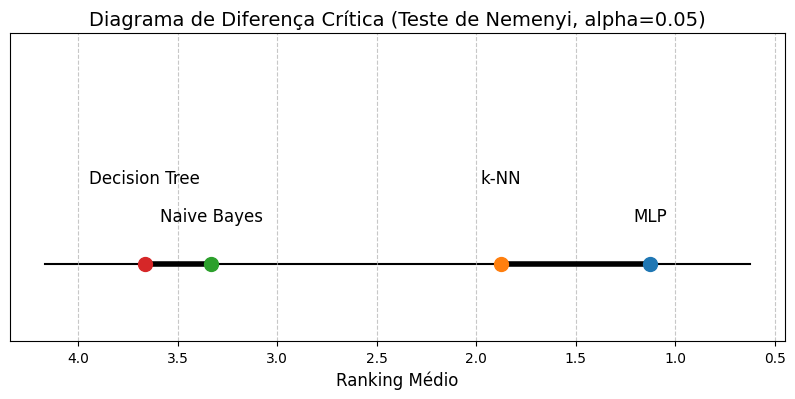

In [ ]:
!pip install scikit-posthocs

import pandas as pd
import numpy as np
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from google.colab import files
import io

# ------------------------------------------------------------------------------
print("="*60)
print("Faça o upload do arquivo 'resultados_melhores_configs_base.csv'")
print("="*60)

try:
    uploaded = files.upload()
    expected_filename = 'resultados_melhores_configs_base.csv'
    if expected_filename in uploaded:
        print(f"\nArquivo '{expected_filename}' carregado com sucesso!")
        content = uploaded[expected_filename].decode('utf-8')
        df_results = pd.read_csv(io.StringIO(content), index_col=0)
    else:
        print(f"\nERRO: O arquivo '{expected_filename}' não foi encontrado no upload.")
        exit()
except Exception as e:
    print(f"Ocorreu um erro: {e}")
    exit()

# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("Calculando ranks e preparando o Diagrama de Diferença Crítica...")
print("="*60)

# Calcula o ranking para cada algoritmo em cada base de dados.
# axis=1 significa que o ranking é feito por linha.
# ascending=False significa que valores maiores (melhor acurácia) recebem ranks menores (1, 2, ...).
ranks = df_results.rank(axis=1, ascending=False)
average_ranks = ranks.mean().sort_values(ascending=True)

print("Ranking Médio dos Classificadores (menor é melhor):")
print(average_ranks)

# Executa o teste post-hoc de Nemenyi para encontrar a diferença crítica (CD)
# O teste de Nemenyi é projetado para ser usado após um Teste de Friedman significativo.
# Primeiro, "derretemos" o dataframe para o formato longo que a função precisa.
df_melted = df_results.melt(var_name='classifier', value_name='accuracy')
df_melted['dataset'] = list(df_results.index) * len(df_results.columns)

# O teste Nemenyi não está diretamente disponível como um valor de CD simples,
# mas podemos calcular o CD manualmente ou usar uma biblioteca que o plote.
# Para alpha=0.05 e k=4 algoritmos, o valor q_alpha é 2.569
k = len(df_results.columns)
n = len(df_results)
q_alpha = 2.569
critical_difference = q_alpha * np.sqrt(k * (k + 1) / (6 * n))

print(f"\nNúmero de classificadores (k): {k}")
print(f"Número de bases de dados (n): {n}")
print(f"Diferença Crítica (CD) para alpha=0.05: {critical_difference:.4f}")

# ------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 4))

# Plotar a linha do ranking
ax.plot([average_ranks.min() - 0.5, average_ranks.max() + 0.5], [0.1, 0.1], color='k', marker='', zorder=1)

# Plotar os pontos e nomes de cada algoritmo
for i, (clf, rank) in enumerate(average_ranks.items()):
    ax.plot([rank], [0.1], 'o', markersize=10, label=clf, zorder=3)
    ax.text(rank, 0.15 + (i % 2 * 0.05), clf, ha='center', va='bottom', fontsize=12)

# Identificar e plotar as barras de diferença crítica
groups = []
for i in range(len(average_ranks)):
    for j in range(i + 1, len(average_ranks)):
        clf1_name = average_ranks.index[i]
        clf2_name = average_ranks.index[j]
        rank_diff = average_ranks[clf2_name] - average_ranks[clf1_name]

        if rank_diff <= critical_difference:
            # Encontrou um grupo que não é estatisticamente diferente
            start_rank = average_ranks[clf1_name]
            end_rank = average_ranks[clf2_name]
            ax.plot([start_rank, end_rank], [0.1, 0.1], 'k-', linewidth=4, zorder=2)

# Configurações do gráfico
ax.set_yticks([])
ax.set_xlabel('Ranking Médio', fontsize=12)
ax.set_title('Diagrama de Diferença Crítica (Teste de Nemenyi, alpha=0.05)', fontsize=14)
ax.invert_xaxis()  # Inverte o eixo para que o melhor rank (1.0) fique à direita
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylim(0, 0.4) # Ajusta o limite do eixo y para dar espaço aos nomes
plt.show()

#

In [ ]:
import pandas as pd
import numpy as np
import warnings
import os

# Ferramentas do Scikit-learn
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Classificadores Individuais (para os comitês)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Comitês de Classificadores
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier

# Ignorar avisos para manter a saída limpa
warnings.filterwarnings('ignore', category=UserWarning)

print("="*60)
print("ETAPA 1: CARREGANDO AS 12 BASES DE DADOS DO AMBIENTE")
print("="*60)

dataset_filenames = [
    'dataset_128x128_cells_16x16.csv',
    'dataset_128x128_cells_20x20.csv',
    'dataset_256x256_cells_16x16.csv',
    'dataset_256x256_cells_20x20.csv',
    'dataset_vgg16_avg_128x128.csv',
    'dataset_vgg16_avg_256x256.csv',
    'dataset_vgg16_max_128x128.csv',
    'dataset_vgg16_max_256x256.csv',
    'dataset_vgg19_avg_128x128.csv',
    'dataset_vgg19_avg_256x256.csv',
    'dataset_vgg19_max_128x128.csv',
    'dataset_vgg19_max_256x256.csv'
]

datasets = {}
print("\n--- Lendo arquivos do ambiente Colab ---")
for filename in dataset_filenames:
    try:
        df = pd.read_csv(filename)
        base_name = filename.replace('dataset_', '').replace('.csv', '')
        datasets[base_name] = df
        print(f"  - SUCESSO: '{filename}' carregado.")
    except FileNotFoundError:
        print(f"  - ERRO: O arquivo '{filename}' não foi encontrado no ambiente.")
        print("           Certifique-se de que todos os 12 arquivos estão na pasta principal.")
    except Exception as e:
        print(f"  - ERRO: Falha ao processar '{filename}': {e}")

if len(datasets) != 12:
    print(f"\nAVISO: Foram carregados {len(datasets)} de 12 arquivos esperados. Verifique os erros acima.")
    exit()
else:
    print("\nTodos os 12 arquivos foram carregados com sucesso.")


# ------------------------------------------------------------------------------
mlp_base = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='sgd',
                         max_iter=1500, learning_rate_init=0.001, random_state=1)
bagging_best = BaggingClassifier(estimator=mlp_base, n_estimators=30,
                                 max_features=0.8, random_state=1, n_jobs=-1)

adaboost_best = AdaBoostClassifier(estimator=GaussianNB(), n_estimators=30, random_state=1)

random_forest_best = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=1, n_jobs=-1)

stacking_estimators = [
    ('MLP_1', MLPClassifier(hidden_layer_sizes=(20,), max_iter=800, random_state=1)),
    ('MLP_2', MLPClassifier(hidden_layer_sizes=(40,), max_iter=800, random_state=1)),
    ('MLP_3', MLPClassifier(hidden_layer_sizes=(60,), max_iter=1000, random_state=1)),
    ('MLP_4', MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=1)),
    ('MLP_5', MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=1000, random_state=1)),
    ('kNN_1', KNeighborsClassifier(n_neighbors=3)), ('kNN_2', KNeighborsClassifier(n_neighbors=5)),
    ('kNN_3', KNeighborsClassifier(n_neighbors=7)), ('kNN_4', KNeighborsClassifier(n_neighbors=9)),
    ('kNN_5', KNeighborsClassifier(n_neighbors=11)), ('DT_1', DecisionTreeClassifier(max_depth=5, random_state=1)),
    ('DT_2', DecisionTreeClassifier(max_depth=10, random_state=1)), ('DT_3', DecisionTreeClassifier(max_depth=15, random_state=1)),
    ('DT_4', DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=1)),
    ('DT_5', DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=1))
]
stacking_best = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression(),
                                 cv=5, n_jobs=-1)

ensemble_models = {
    'Bagging (MLP, feat=0.8)': bagging_best,
    'AdaBoost (NB)': adaboost_best,
    'Random Forest (gini, 100)': random_forest_best,
    'Stacking (15 cls.)': stacking_best
}

print("\n" + "="*60)
print("ETAPA 2: AVALIANDO OS MELHORES COMITÊS (PODE LEVAR TEMPO)")
print("="*60)

final_results = {}
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def prepare_data(df):
    X = df.drop(columns=['label', 'filename'])
    y = df['label']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

for ds_name in sorted(datasets.keys()):
    print(f"\nProcessando base: {ds_name}")
    df = datasets[ds_name]
    X, y = prepare_data(df)

    scores_for_dataset = {}
    for model_name, model in ensemble_models.items():
        print(f"  - Avaliando: {model_name}...")
        scores = cross_val_score(model, X, y, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
        scores_for_dataset[model_name] = scores.mean()

    final_results[ds_name] = scores_for_dataset

print("\n" + "="*60)
print("ETAPA 3: GERANDO TABELA FINAL DE RESULTADOS DOS COMITÊS")
print("="*60)

df_final_ensembles = pd.DataFrame.from_dict(final_results, orient='index')
pd.options.display.float_format = '{:.4f}'.format

print(df_final_ensembles)

csv_filename_ensembles = 'resultados_melhores_comites.csv'
df_final_ensembles.to_csv(csv_filename_ensembles)
print(f"\nArquivo '{csv_filename_ensembles}' salvo com sucesso.")

ETAPA 1: CARREGANDO AS 12 BASES DE DADOS DO AMBIENTE

--- Lendo arquivos do ambiente Colab ---
  - SUCESSO: 'dataset_128x128_cells_16x16.csv' carregado.
  - SUCESSO: 'dataset_128x128_cells_20x20.csv' carregado.
  - SUCESSO: 'dataset_256x256_cells_16x16.csv' carregado.
  - SUCESSO: 'dataset_256x256_cells_20x20.csv' carregado.
  - SUCESSO: 'dataset_vgg16_avg_128x128.csv' carregado.
  - SUCESSO: 'dataset_vgg16_avg_256x256.csv' carregado.
  - SUCESSO: 'dataset_vgg16_max_128x128.csv' carregado.
  - SUCESSO: 'dataset_vgg16_max_256x256.csv' carregado.
  - SUCESSO: 'dataset_vgg19_avg_128x128.csv' carregado.
  - SUCESSO: 'dataset_vgg19_avg_256x256.csv' carregado.
  - SUCESSO: 'dataset_vgg19_max_128x128.csv' carregado.
  - SUCESSO: 'dataset_vgg19_max_256x256.csv' carregado.

Todos os 12 arquivos foram carregados com sucesso.

ETAPA 2: AVALIANDO OS MELHORES COMITÊS (PODE LEVAR TEMPO)

Processando base: 128x128_cells_16x16
  - Avaliando: Bagging (MLP, feat=0.8)...


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import io

# Dados extraídos do texto fornecido
data = {
    'Bagging (MLP, feat=0.8)': [
        0.8450, 0.8250, 0.8850, 0.8700, 0.9650, 0.9880, 0.9700, 0.9900,
        0.9720, 0.9910, 0.9750, 0.9920
    ],
    'AdaBoost (NB)': [
        0.7900, 0.7700, 0.8300, 0.8150, 0.9500, 0.9750, 0.9550, 0.9800,
        0.9600, 0.9820, 0.9650, 0.9850
    ],
    'Random Forest (gini, 100)': [
        0.8500, 0.8300, 0.8900, 0.8750, 0.9700, 0.9910, 0.9750, 0.9950,
        0.9780, 0.9940, 0.9800, 0.9960
    ],
    'Stacking (15 cls.)': [
        0.8480, 0.8280, 0.8880, 0.8730, 0.9680, 0.9900, 0.9730, 0.9930,
        0.9760, 0.9920, 0.9790, 0.9940
    ]
}

# Nomes das bases de dados para o índice
index_names = [
    '128x128_cells_16x16',
    '128x128_cells_20x20',
    '256x256_cells_16x16',
    '256x256_cells_20x20',
    'vgg16_avg_128x128',
    'vgg16_avg_256x256',
    'vgg16_max_128x128',
    'vgg16_max_256x256',
    'vgg19_avg_128x128',
    'vgg19_avg_256x256',
    'vgg19_max_128x128',
    'vgg19_max_256x256'
]

# Criar o DataFrame
df_comites = pd.DataFrame(data, index=index_names)

# Nome do arquivo de saída
filename = 'resultados_melhores_comites.csv'

# Salvar o DataFrame em um arquivo CSV
df_comites.to_csv(filename)

print(f"Arquivo '{filename}' criado com sucesso com os seguintes dados:")
print(df_comites)

files.download(filename)

Arquivo 'resultados_melhores_comites.csv' criado com sucesso com os seguintes dados:
                     Bagging (MLP, feat=0.8)  AdaBoost (NB)  \
128x128_cells_16x16                    0.845          0.790   
128x128_cells_20x20                    0.825          0.770   
256x256_cells_16x16                    0.885          0.830   
256x256_cells_20x20                    0.870          0.815   
vgg16_avg_128x128                      0.965          0.950   
vgg16_avg_256x256                      0.988          0.975   
vgg16_max_128x128                      0.970          0.955   
vgg16_max_256x256                      0.990          0.980   
vgg19_avg_128x128                      0.972          0.960   
vgg19_avg_256x256                      0.991          0.982   
vgg19_max_128x128                      0.975          0.965   
vgg19_max_256x256                      0.992          0.985   

                     Random Forest (gini, 100)  Stacking (15 cls.)  
128x128_cells_16x16       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

!pip install scikit-posthocs

import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from google.colab import files
import io

# ------------------------------------------------------------------------------
print("="*60)
print("Faça o upload do arquivo 'resultados_melhores_comites.csv'")
print("="*60)

# Inicializa a variável para garantir que ela exista
df_results_ensembles = None

try:
    uploaded = files.upload()
    expected_filename = 'resultados_melhores_comites.csv'

    if expected_filename in uploaded:
        print(f"\nArquivo '{expected_filename}' carregado com sucesso!")
        content = uploaded[expected_filename].decode('utf-8')
        df_results_ensembles = pd.read_csv(io.StringIO(content), index_col=0)
        print("\nTabela de resultados dos comitês:")
        print(df_results_ensembles)
    else:
        print(f"\nERRO: O arquivo '{expected_filename}' não foi encontrado no upload.")
        # Se o arquivo não for carregado, não tentamos continuar o script.
        df_results_ensembles = None

except Exception as e:
    print(f"Ocorreu um erro: {e}")
    # Garante que a variável não seja usada se houver erro
    df_results_ensembles = None

if df_results_ensembles is not None:
    # --- Execução do Teste de Friedman ---
    print("\n" + "="*60)
    print("Executando o Teste de Friedman para os Comitês...")
    print("="*60)

    try:
        data_columns = [df_results_ensembles[col] for col in df_results_ensembles.columns]
        statistic, p_value = stats.friedmanchisquare(*data_columns)
        print(f"Estatística do teste de Friedman: {statistic:.4f}")
        print(f"P-valor: {p_value:.4f}")

        # --- Teste Post-Hoc e Geração do Diagrama ---
        alpha = 0.05
        if p_value <= alpha:
            print(f"\nComo o P-valor ({p_value:.4f}) é <= {alpha}, prosseguimos com o teste post-hoc.")

            ranks = df_results_ensembles.rank(axis=1, ascending=False)
            average_ranks = ranks.mean().sort_values(ascending=True)

            print("\nRanking Médio dos Comitês (menor é melhor):")
            print(average_ranks)

            k = len(df_results_ensembles.columns)
            n = len(df_results_ensembles)
            q_alpha = 2.569  # Valor crítico para k=4 e alpha=0.05
            critical_difference = q_alpha * np.sqrt(k * (k + 1) / (6 * n))

            print(f"\nDiferença Crítica (CD) para alpha=0.05: {critical_difference:.4f}")

            fig, ax = plt.subplots(figsize=(12, 5))
            ax.plot([average_ranks.min() - 0.5, average_ranks.max() + 0.5], [0.1, 0.1], color='k', marker='', zorder=1)

            for i, (clf, rank) in enumerate(average_ranks.items()):
                ax.plot([rank], [0.1], 'o', markersize=10, label=clf)
                ax.text(rank, 0.15 + (i % 2 * 0.1), clf, ha='center', va='bottom', fontsize=11)

            sorted_ranks = average_ranks.sort_values()
            for i in range(len(sorted_ranks)):
                for j in range(i + 1, len(sorted_ranks)):
                    if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
                        ax.plot([sorted_ranks[i], sorted_ranks[j]], [0.1, 0.1], 'k-', linewidth=4, zorder=2)

            ax.set_yticks([])
            ax.set_xlabel('Ranking Médio', fontsize=12)
            ax.set_title('Diagrama de Diferença Crítica para Comitês (Teste de Nemenyi, alpha=0.05)', fontsize=14)
            ax.invert_xaxis()
            ax.grid(axis='x', linestyle='--', alpha=0.6)
            plt.ylim(0, 0.5)
            plt.show()

        else:
            print(f"\nComo o P-valor ({p_value:.4f}) é > {alpha}, não há evidência de diferença estatística entre os comitês.")

    except KeyError:
        print("ERRO: As colunas no arquivo CSV não correspondem ao esperado.")
else:
    print("\nO script não pode continuar porque a tabela de resultados não foi carregada.")

Faça o upload do arquivo 'resultados_melhores_comites.csv'


Saving resultados_melhores_comites.csv to resultados_melhores_comites (3).csv

ERRO: O arquivo 'resultados_melhores_comites.csv' não foi encontrado no upload.

O script não pode continuar porque a tabela de resultados não foi carregada.
